#Contexto
Em 2021 o Ifood atingiu uma nova marca de 60 milhões de pedidos mensais, um crescimento de 100% em um ano; mais de 110.000 restaurantes se inscreveram na plataforma nos últimos 12 meses e só em março, o mês mais letal da pandemia para o Brasil, 270 mil restaurantes operavam com a plataforma.

A diversidade e amplitude de clientes que utilizam a plataforma do iFood é gigante - a cobertura do aplicativo se estende por muitas geografias no Brasil,
de múltiplos gostos, regionalismos e bolsos. Alguns buscam uma experiência no momento da refeição, outros só querem receber a marmita na hora
certa para não se atrasar para a primeira reunião pós-almoço. Neste contexto é preciso entender melhor o perfil de cada cliente!


#Desafio
Compreender melhor o perfil de cada cliente, pensando na segmentação é possivel descobrir diversas informações como por exemplo:

- Quem é o mais fiel e quem mais compra conosco?
- Quem mais gosta de cupom?
- Quem gosta de entrega grátis?
- Qual o padrão de consumo?
- Qual o padrão de comportamento? Quanto os clientes vão gastar? Onde?
- Clientes que têm o maior tempo entre pedido e entrega têm menor recorrência na plataforma?
- Clientes que usam iOS (Apple) tem pedidos com maior ticket médio?
- Clientes com mais sessões fazem mais pedidos?

Essa são algumas das perguntas que pretendo responder com este projeto, a medida que me aprofundo nos dados tentarei extrair um maior numero de informações.  

#Dados
Os dados representam um total de 20.249 clientes diferentes: únicos e anonimizados: na base: que realizaram 226.269 pedidos: em 7 meses (fevereiro a setembro): através de mais de 3.5 milhões de sessões abertas no aplicativo.

São 51 features dividas em 3 bases.

#Dicionario

##Order
```
order_id: ID único para pedido
order_shift:0 - 4:59h - weekday/weekend dawn5 - 9:59h - weekday/weekend breakfast10 - 14:59h - weekday/weekend lunch15 - 16:59h - weekday/weekend snack17 - 23:59h - weekday/weekend dinner
order_origin:"Tipo do Merchant: STORE (loja), QUICKLY_MEAL (refeição rápida e barata): RESTAURANT (restaurante)"
delivery_fee:Taxa de entrega paga pelo cliente
scheduled:Booleano que indica se o pedido foi agendado
total_amount:Valor total pago pelo cliente (em Unidades Monetárias UM)
subsidy_amount:"Subsídio: desconto dado no pedido (em Unidades Monetárias UM) - (para o valor final total do pedido: total_amount + subsidy)"
device_platform:"Plataforma (sistema operacional) utilizado para fazer o pedido (ANDROID, DESKTOP, etc)"
device_type:"Canal de origem do pedido (SITE, MOBILE, etc)"
device_app_version:Versão do aplicativo do iFood que fez o pedido
centroid_id:Id da centroide do clientes
state_label:Sigla da UF do cliente
city:Cidade do cliente
district:Bairro do cliente
customer_long:Longitude do cliente (até 2ª casa decimal) - ~1km
customer_lat:Latitude do cliente (até 2ª casa decimal) - ~1km
restaurant_id:Identificador do restaurante
dish_type:Tipo de cozinha
group_id:"Se o restaurante fizer parte de um grupo, essa é a identificação do grupo"
merchant_centroid_id:Id da centroide
merchant_state:Sigla do UF do Merchant
merchant_city:Cidade do Merchant
merchant_district:Distrito do Merchant
merchant_zipcode:CEP do Merchant
merchant_long:Longitude do Merchant (até 2ª casa decimal)
merchant_lat:Latitude do Merchant (até 2ª casa decimal)
has_free_delivery:Booleano que indica se o pedido foi entrega gratis
confirmed_date:Data que o pedido foi confirmado pelo restaurante
concluded_date:Data em que o pedido foi concluído
lag_last_order:Tempo em dias entre o pedido atual e o último pedido do cliente
account_id:ID do usuário

```
##Marketing
```
account_id:ID do usuário
registration_date:Data de registro da conta

platform_status:"Current customer situtation based on specific clusters:
 - New: First concluded order made on current month (Customer M0).
 - Reactivated: Customer have a concluded order on current month, no orders last month and is not a New Customer
 - Active: Customer have a concluded order on current month and is not Reactivated or New
 - Churn: Customer have concluded orders last month but hasn't mande and order on current month yet
 - Inactive: Customer has a first concluded order but hasn't been active on current and last month
 - Prospect: Customer hasn't made first order yet"

platform_status_last_month:"Current customer situtation based on specific clusters:
 - New: First concluded order made on current month (Customer M0).
 - Reactivated: Customer have a concluded order on current month, no orders last month and is not a New Customer
 - Active: Customer have a concluded order on current month and is not Reactivated or New
 - Churn: Customer have concluded orders last month but hasn't mande and order on current month yet
 - Inactive: Customer has a first concluded order but hasn't been active on current and last month
 - Prospect: Customer hasn't made first order yet"

total_order_count:Total de pedidos feito pelo cliente
first_order_date:Data do primeiro pedido feito pelo cliente

```
##Session
```
session_id:ID da sessão
user_account_uuid:ID do usuário
session_started:Horário de início da sessão
session_ended:Horário de término da sessão
install_timestamp:"Primeira instalação do app: após setup"
sum_view_restaurant_screen:Quantidade de restaurantes vistos
sum_view_dish_screen:Quantidade de pratos vistos
sum_click_add_item:"Quantidade de clicks: ao adicionar um item ao carrinho"
sum_view_checkout:Quantidade de eventos no checkout
sum_callback_purchase:Quantidade de eventos de callbacks
first_order_has_voucher:"Para fazer o primeiro pedido: foi utilizado voucher?"
media_campaign:Se sessão foi inciada por campanha de media
load_time:Tempo de carregamento inicial da sessão
available_restaurants:Quantidade de restaurantes disponíveis para o cliente no momento do pedido
review_score:
nps_score:
review_created_date:
```


##Importando Bibliotecas

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount("/content/gdrive")

#aumentando o limite de colunas a ser exbida
pd.set_option("display.max_columns", 400)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#EDA

In [ ]:
df_sessions = pd.read_csv('/content/gdrive/MyDrive/STORAGE/Data/Ifood/sessions.csv', sep=';')
df_orders = pd.read_csv('/content/gdrive/MyDrive/STORAGE/Data/Ifood/Orders.csv', sep=';')
df_marketing = pd.read_csv('/content/gdrive/MyDrive/STORAGE/Data/Ifood/Marketing.csv', sep=';')

##Analisando Orders

In [ ]:
df_orders

,order_id,order_shift,order_origin,delivery_fee,scheduled,total_amount,subsidy_amount,device_platform,device_type,device_app_version,centroid_id,state_label,city,district,customer_long,customer_lat,restaurant_id,dish_type,group_id,merchant_centroid_id,merchant_state,merchant_city,merchant_district,merchant_zipcode,merchant_long,merchant_lat,has_free_delivery,confirmed_date,concluded_date,lag_last_order,account_id,review_score,nps_score,review_created_at
0,000f4c94-ec38-488b-ad98-9bf3ea19d517,weekday lunch,RESTAURANT,875.00,False,5375.00,0.00,ANDROID,MOBILE,9.39.1,-22.83-43.35,RJ,RIO DE JANEIRO,Coelho Neto,-43.35,-22.83,83c3e069dbd7267a7565a16b879cd968c0968a27ac16e6...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.82-43.38,RJ,RIO DE JANEIRO,PAVUNA,21650420,-43.38,-22.83,False,2020-02-28T14:07:25.953Z,2020-02-28T16:06:03.701Z,1.0,70a2a5a3-8071-47fc-a623-e9995045314e,5.0,8,2020-02-28T19:06:31.861Z
1,0018ed39-3ae0-4047-9c9e-fd9a2027e645,weekend dinner,RESTAURANT,0.00,False,2987.50,1250.00,IOS,MOBILE,9.63.0,-22.93-43.18,RJ,RIO DE JANEIRO,FLAMENGO,-43.18,-22.94,2531d200d387f462ed6e096086723c43b48de9b6c3ec05...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.93-43.21,RJ,RIO DE JANEIRO,Rio Comprido,20261170,-43.22,-22.93,True,2020-08-21T21:12:23.295Z,2020-08-21T21:59:18.732Z,1.0,407bab9f-f485-48cd-abea-66e6283058c3,5.0,8,2020-09-04T00:14:14.365Z
2,00214248-5a2d-4333-a919-c1f3afd31389,weekday dinner,RESTAURANT,0.00,False,3737.50,2123.75,IOS,MOBILE,9.56.0,-23.6-46.64,SP,SAO PAULO,Vila Clementino,-46.65,-23.60,e648c3eeabfbbc52d415e4f2b4bb07ed0206c7fff7fb9c...,Comida Peruana,5384e3b557315ce815e7e3425a4d067f1ecff96978501e...,-23.61-46.67,SP,SAO PAULO,INDIANOPOLIS,4029200,-46.67,-23.62,True,2020-07-02T20:21:51.900Z,2020-07-02T20:53:39.176Z,3.0,a16865d2-a3ca-4251-afab-083dadeb06e9,5.0,5,2020-07-03T03:49:03.214Z
3,007199e6-6be4-42d0-986c-a0de7650dc80,weekday dinner,RESTAURANT,862.50,False,2237.50,1.25,DESKTOP,SITE,8.39.0,-22.96-43.39,RJ,RIO DE JANEIRO,Curicica,-43.39,-22.96,c3b2f2bc35b781c126ab4e78db73aa5609e55b1eff34c8...,Pizza,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.96-43.4,RJ,RIO DE JANEIRO,Curicica,22780193,-43.40,-22.96,False,2020-08-19T20:16:16.718Z,2020-08-19T22:16:16.298Z,0.0,a7f00fd8-d5d6-4604-9bce-ffe35b16848d,5.0,10,2020-08-26T17:44:08.137Z
4,00bb6d10-0a9b-4fe3-9b25-8d18f50bcc3a,weekday lunch,RESTAURANT,0.00,False,2750.00,0.00,DESKTOP,SITE,8.12.0,-23.57-46.64,SP,SAO PAULO,Liberdade,-46.64,-23.57,63271292b131c157593c309acfcbcd5756ec1440879e64...,Comida Brasileira,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-23.59-46.64,SP,SAO PAULO,Vila Mariana,4009002,-46.64,-23.59,True,2020-04-15T13:01:55.231Z,2020-04-15T17:02:37.723Z,1.0,63284037-3ade-4600-88e9-5009b9504d8f,5.0,10,2020-04-17T22:05:13.983Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226264,fe810a8e-97be-4a85-a6c0-eb446fd72fd9,weekend dawn,RESTAURANT,375.00,False,10437.50,0.00,IOS,MOBILE,9.52.0,-22.95-43.34,RJ,RIO DE JANEIRO,ANIL,-43.34,-22.95,d07d54994d14abe915f1fd678ed66284d6810d60344536...,Lanches,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-22.95-43.36,RJ,RIO DE JANEIRO,Cidade de Deus,22763011,-43.36,-22.95,False,2020-05-31T01:12:22.097Z,2020-05-31T03:23:49.538Z,2.0,f415e4e7-097a-4b32-8fb9-6361658db37b,5.0,10,2020-05-31T06:24:22.437Z
226265,feb7b532-9602-4623-b89d-32697a0b6e17,weekday breakfast,RESTAURANT,873.75,False,6348.75,0.00,ANDROID,MOBILE,9.56.0,-23.6-46.61,SP,SAO PAULO,Vila Nair,-46.61,-23.61,70f36e5a2493ada1c021b99241012501a241d946c2564a...,Padaria,ae3c8b8d99a39542f78af83dbbb42c81cd94199ec1b5f6...,-23.58-46.61,SP,SAO PAULO,Ipiranga,4205001,-46.61,-23.59,False,2020-06-30T08:27:56.247Z,2020-06-30T08:51:08.729Z,1.0,d03e5849-703e-4e49-a051-7a5d652c3b28,5.0,10,2020-06-30T17:13:24.936Z
226266,ff54b0d0-6bd3-4bad-a34c-ec64f0b17787,weekday dinner,RESTAURANT,875.00,False,8512.50,1.25,IOS,MOBILE,9.48.0,-23.58-4

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226269 entries, 0 to 226268
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              226269 non-null  object 
 1   order_shift           226269 non-null  object 
 2   order_origin          226269 non-null  object 
 3   delivery_fee          226269 non-null  float64
 4   scheduled             226269 non-null  bool   
 5   total_amount          226269 non-null  float64
 6   subsidy_amount        226269 non-null  float64
 7   device_platform       226269 non-null  object 
 8   device_type           226269 non-null  object 
 9   device_app_version    221834 non-null  object 
 10  centroid_id           226269 non-null  object 
 11  state_label           226269 non-null  object 
 12  city                  226269 non-null  object 
 13  district              226269 non-null  object 
 14  customer_long         226269 non-null  float64
 15  

é possivel perceber que existem alguns dados nulos em device_app_version, confirmed_date, concluded_date, lag_last_order, também e possivel perceber que as colunas de data são do tipo Object. Por hora irei transformar essas colunas de data em datetime para facilitar a analise, porem não vou dar nenhum tratamento aos nulos por enquanto.        

In [ ]:
df_orders[['confirmed_date','concluded_date']]

,confirmed_date,concluded_date
0,2020-02-28T14:07:25.953Z,2020-02-28T16:06:03.701Z
1,2020-08-21T21:12:23.295Z,2020-08-21T21:59:18.732Z
2,2020-07-02T20:21:51.900Z,2020-07-02T20:53:39.176Z
3,2020-08-19T20:16:16.718Z,2020-08-19T22:16:16.298Z
4,2020-04-15T13:01:55.231Z,2020-04-15T17:02:37.723Z
...,...,...
226264,2020-05-31T01:12:22.097Z,2020-05-31T03:23:49.538Z
226265,2020-06-30T08:27:56.247Z,2020-06-30T08:51:08.729Z
226266,2020-04-29T20:18:36.920Z,2020-04-30T00:18:36.307Z
226267,2020-09-24T09:35:59.186Z,2020-09-24T09:59:05.377Z


Bom aqui tenho os valores de date, porem não consegui descobrir o que seria T e também tem o Z no final apos os milessegundos, pesquisando vi que poderia ser algo relacionado a fusohorario. Vou tentar remover ambos e caso eu veja que faça sentido retorno e mantenho essas informações de alguma forma.

In [ ]:
from datetime import datetime

#Função para converter a string em datetime
def parse_datetime(s):
    if isinstance(s, str):
        #Removendo o "T" e os milissegundos junto com o "Z"
        s = s.replace("T", " ").split(".")[0] #[0] pegando o primeiro elemento da lista do split
        #Convertendo a string em datetime
        return datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
    else:
        return np.nan  #Retornando NaN se o valor não for uma string

#Aplicando a função de parsing às colunas 'confirmed_date' e 'concluded_date'
df_orders['confirmed_date'] = df_orders['confirmed_date'].apply(parse_datetime)
df_orders['concluded_date'] = df_orders['concluded_date'].apply(parse_datetime)

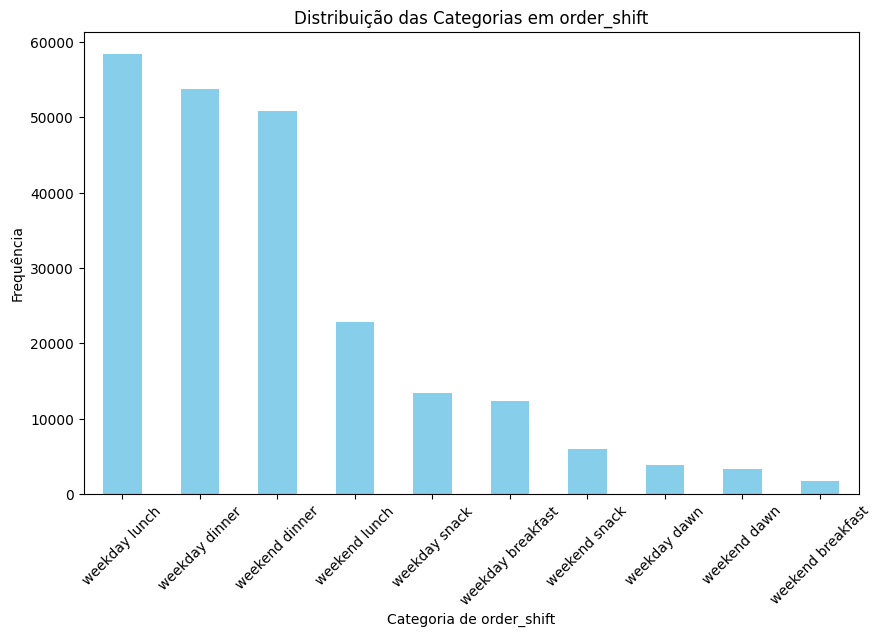

In [ ]:
import matplotlib.pyplot as plt

#Contagem da frequência de cada categoria em order_shift
order_shift_counts = df_orders['order_shift'].value_counts()

#Plotando um gráfico de barras para visualizar a distribuição
plt.figure(figsize=(10, 6))
order_shift_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Categorias em order_shift')
plt.xlabel('Categoria de order_shift')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  #Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()


Ao contrario do que pressupus o maior numero de pedidos acontece no almoço seguido da janta durante a semana, e não aos fins de semana como imaginei que teria o maior numero de pedidos, isso se deve ao fato provavelmente que são 4/5 dias considerados dia da semana contra 2/3 de fim de semana, porem o jantar do fim de semana não fica muito atras.  

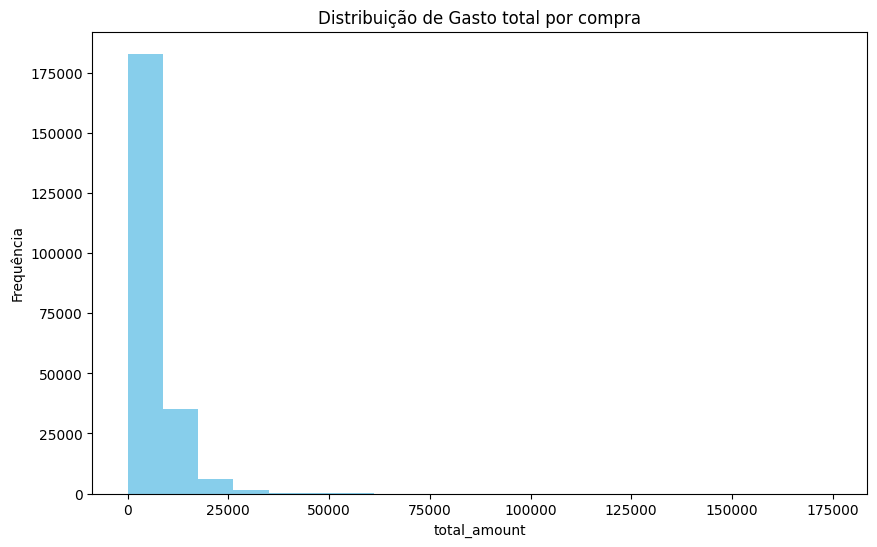

In [ ]:
#Histograma de total_amount
plt.figure(figsize=(10, 6))
plt.hist(df_orders['total_amount'], bins=20, color='skyblue')
plt.title('Distribuição de Gasto total por compra')
plt.xlabel('total_amount')
plt.ylabel('Frequência')
plt.show()


Aparentemente os casos onde o valor total e maior que 25 mil são muito baixos, outra observação é que provavelmente os valores estão em escalas maiores do que valores reais, a feature especifica valor monetario sem especificar o quanto de fato foi gasto, muito provavelmente este valor foi alterado para proteger informações de gasto do cliente.

In [ ]:
percentiles = [0.01, 0.03, 0.05, 0.80, 0.85, 0.90, 0.95, 0.99]

#Calculando as estatísticas descritivas com os percentis especificados
total_amount_stats = df_orders['total_amount'].describe(percentiles=percentiles)

print("Estatísticas descritivas para total_amount com percentis:")
print(total_amount_stats)



Estatísticas descritivas para total_amount com percentis:
count    226269.000000
mean       6017.809350
std        5180.780032
min           0.000000
1%          625.000000
3%          862.500000
5%         1373.750000
50%        4500.000000
80%        8562.500000
85%        9873.750000
90%       11873.750000
95%       15498.750000
99%       25236.650000
max      174873.750000
Name: total_amount, dtype: float64


como é possivel ver 99% dos dados estão com valores muito inferiores ao valor maximo, provavelmente irei trunkar essa feature em 99% na parte de tratamento dos dados e talvez eu divida o valor dessas features por 100, caso eu veja que não ira impactar nenhum outro resultado, somente para ter valores mais proximos do real.

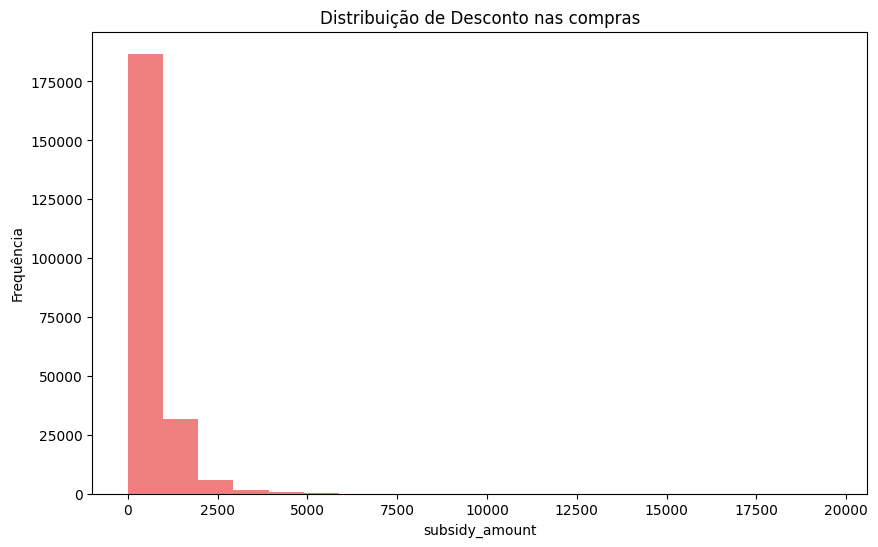

In [ ]:
#Histograma de subsidy_amount
plt.figure(figsize=(10, 6))
plt.hist(df_orders['subsidy_amount'], bins=20, color='lightcoral')
plt.title('Distribuição de Desconto nas compras')
plt.xlabel('subsidy_amount')
plt.ylabel('Frequência')
plt.show()


Para os descontos a distribuição parece ser bem semelhante ao valor total de compra.

In [ ]:
percentiles = [0.01, 0.03, 0.05, 0.80, 0.85, 0.90, 0.95, 0.99]

#Calculando as estatísticas descritivas com os percentis especificados
total_amount_stats = df_orders['subsidy_amount'].describe(percentiles=percentiles)

print("Estatísticas descritivas para total_amount com percentis:")
print(total_amount_stats)

Estatísticas descritivas para total_amount com percentis:
count    226269.000000
mean        343.687580
std         677.852181
min          -2.500000
1%           -1.250000
3%            0.000000
5%            0.000000
50%           0.000000
80%         626.250000
85%        1125.000000
90%        1250.000000
95%        1747.500000
99%        2987.500000
max       19611.250000
Name: subsidy_amount, dtype: float64


por algum motivo existe valores negativos nos descontos, o que a primeiro momento não consigo encontrar algo que justifique isto, talvez tenha que trunkar esses valores negativos em 0 e realizar o trunk de 99%

In [ ]:
#Contagem de pedidos agendados
agendados = df_orders[df_orders['scheduled'] == True]
#Contagem de todos os pedidos
total_pedidos = len(df_orders)
#Calculando a proporção de pedidos agendados em relação ao total de pedidos
proporcao_agendados = len(agendados) / total_pedidos
print("Proporção de pedidos agendados em relação ao total de pedidos:", proporcao_agendados)


Proporção de pedidos agendados em relação ao total de pedidos: 0.024687429563926125


Apenas 2% dos pedidos foram agendados ou seja 98% dos pedidos foram feitos no momento que o cliente desejou o consumo.

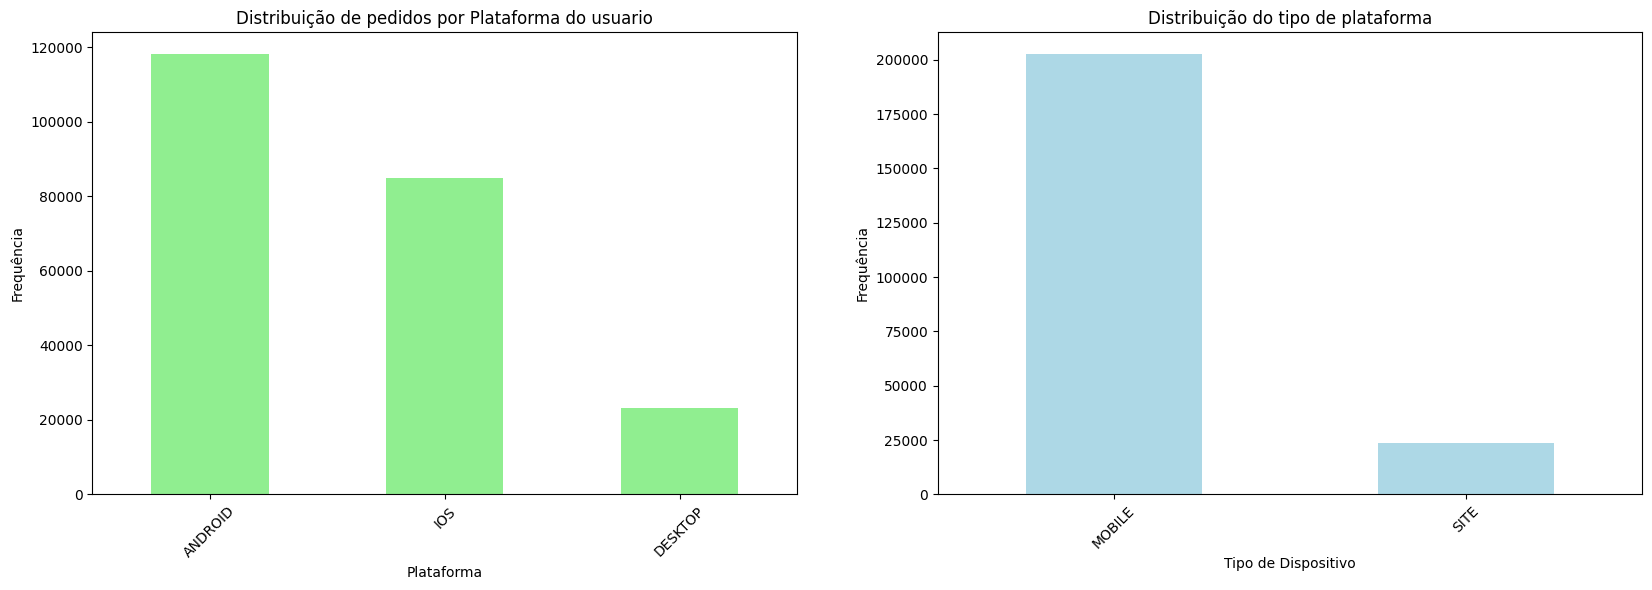

In [ ]:
#Contagem da frequência de cada plataforma em device_platform
device_platform_counts = df_orders['device_platform'].value_counts()

#Plotando um gráfico de barras para visualizar a distribuição
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
device_platform_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribuição de pedidos por Plataforma do usuario')
plt.xlabel('Plataforma')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  #Rotaciona os rótulos do eixo x para melhor legibilidade

#Contagem da frequência de cada tipo de dispositivo em device_type
device_type_counts = df_orders['device_type'].value_counts()
plt.subplot(1, 2, 2)
#Plotando um gráfico de barras para visualizar a distribuição
device_type_counts.plot(kind='bar', color='lightblue')
plt.title('Distribuição do tipo de plataforma')
plt.xlabel('Tipo de Dispositivo')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  #Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

Bom ja era esperado ter um numero maior de pedidos do android, porem mesmo sabendo que o numero de usuarios de IOS são bem menores, ainda tem um bom numero de pedidos para o mesmo, aqui já é possivel pensar se usuarios de IOS acabam comprando mais que usuarios de Android. Também existe alguns pedidos feitos por desktop atraves do site, porem com uma frequencia bem menor.

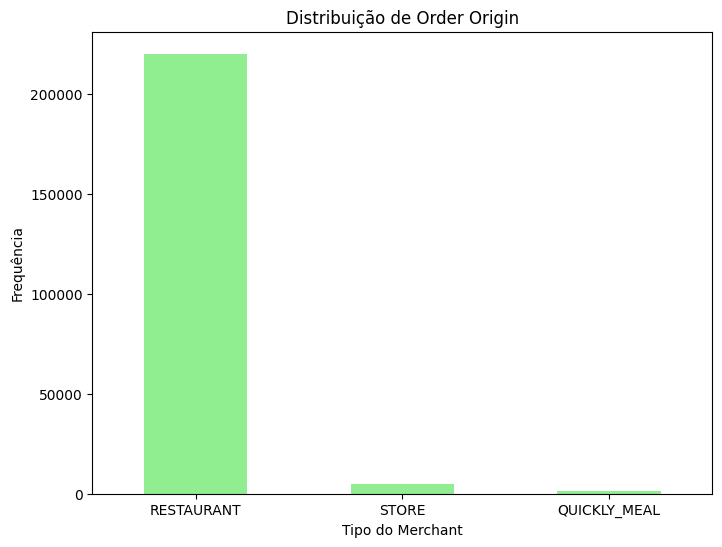

In [ ]:
#Contagem da frequência de cada categoria em order_origin
order_origin_counts = df_orders['order_origin'].value_counts()

#Plotando um gráfico de barras para visualizar a distribuição
plt.figure(figsize=(8, 6))
order_origin_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribuição de Order Origin')
plt.xlabel('Tipo do Merchant')
plt.ylabel('Frequência')
plt.xticks(rotation=0)  #Não rotaciona os rótulos do eixo x
plt.show()

Os dados demonstram que a maior parte dos pedidos são entreugues por restaurantes, porem por presuposição propria acredito que isso seja por má classificação do proprio estabelecimento, e pela falta de mais opções de categorias, ja que alem de restaurante temos apenas loja, e refeição rapida, o que faz grande parcela dos clientes colocar que é restaurante ao inves de uma classificação mais apropriada.

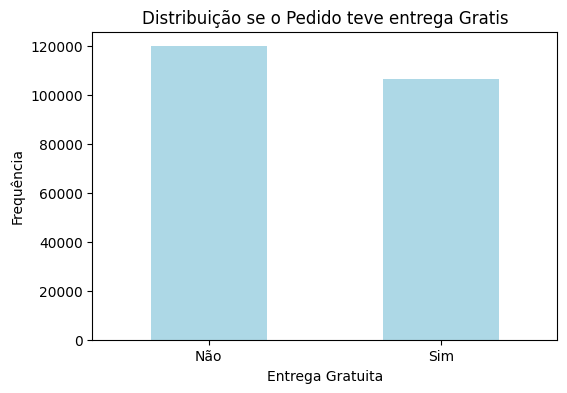

In [ ]:
#Contagem da frequência de pedidos com e sem entrega gratuita em has_free_delivery
has_free_delivery_counts = df_orders['has_free_delivery'].value_counts()

#Plotando um gráfico de barras para visualizar a distribuição
plt.figure(figsize=(6, 4))
has_free_delivery_counts.plot(kind='bar', color='lightblue')
plt.title('Distribuição se o Pedido teve entrega Gratis')
plt.xlabel('Entrega Gratuita')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.xticks([0, 1], ['Não', 'Sim'])  #Rótulos personalizados para False (0) e True (1)
plt.show()


A proporção de se o pedido teve ou não entrega gratis são bem proximas, é interessante lembrar que normalmente quando a entrega e gratis e por que o pedido é entregue pela propria loja, não utilizando motoristas parceiros do proprio aplicativo.

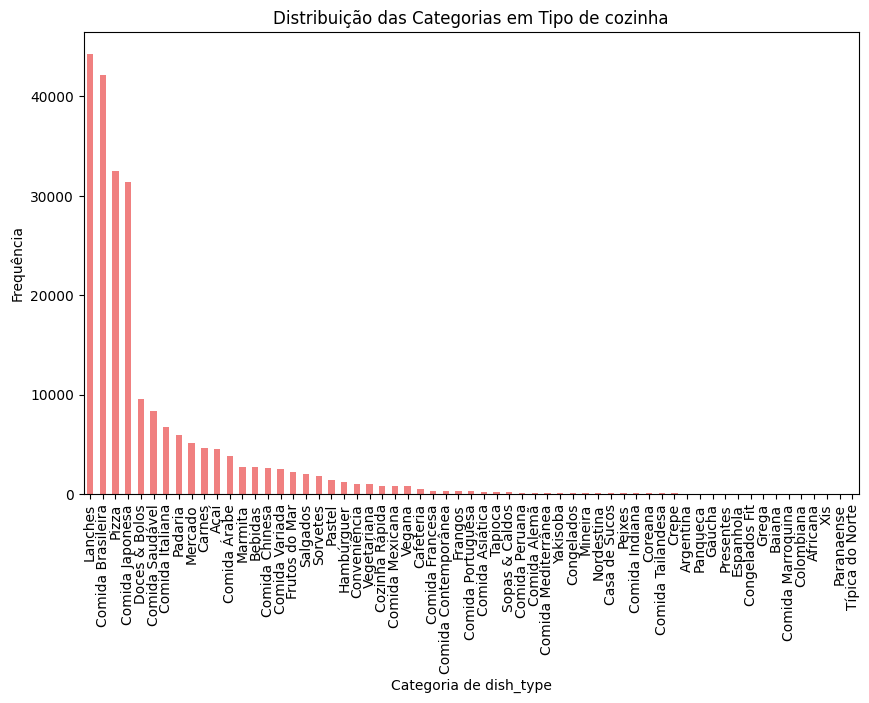

In [ ]:
#Contagem da frequência de cada categoria em dish_type
dish_type_counts = df_orders['dish_type'].value_counts()

#Plotando um gráfico de barras para visualizar a distribuição
plt.figure(figsize=(10, 6))
dish_type_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribuição das Categorias em Tipo de cozinha')
plt.xlabel('Categoria de dish_type')
plt.ylabel('Frequência')
plt.xticks(rotation=90)  #Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()


Em tipos de cozinha, é possivel perceber que lanches é o tipo de comida mais procurada pelos clientes seguido de comida brasileira, pizza e comida japonesa. as demais opções possuem uma frequencia muito menor.


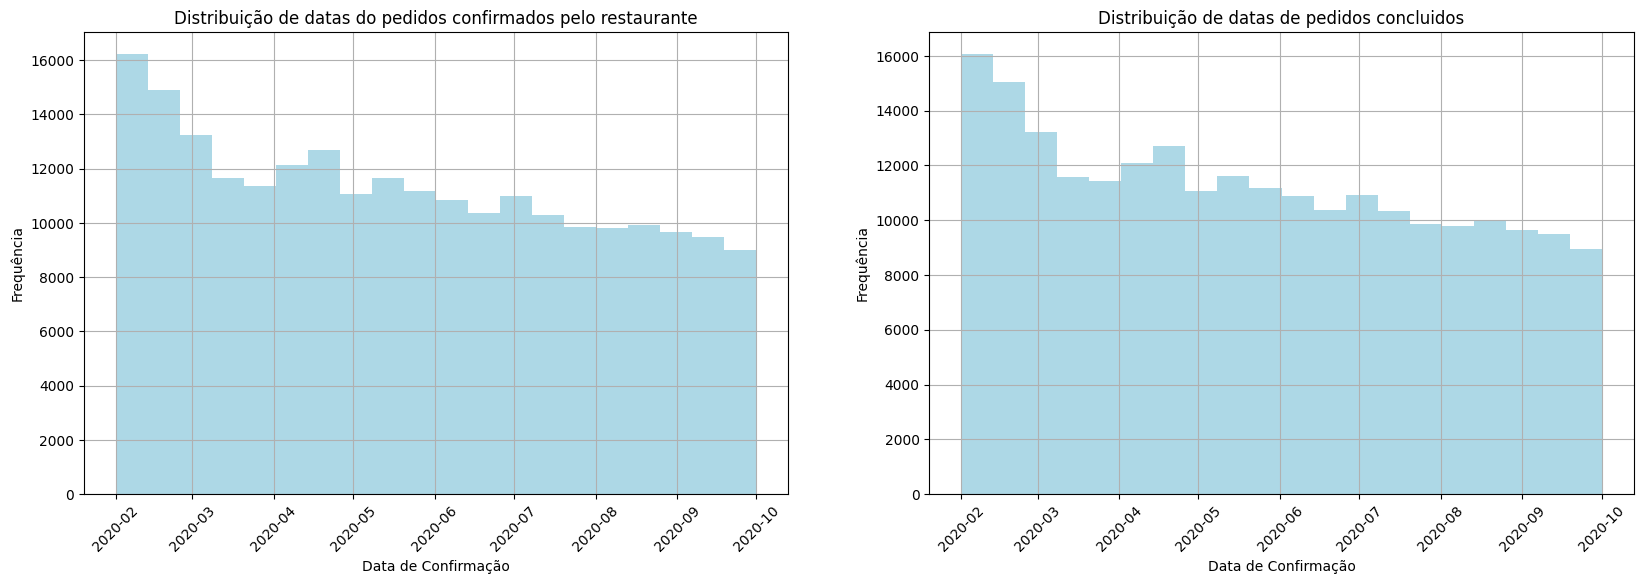

In [ ]:
plt.figure(figsize=(20, 6))
#Plotando um histograma das datas
plt.subplot(1, 2, 1)
df_orders['confirmed_date'].hist(bins=20, color='lightblue')
plt.title('Distribuição de datas do pedidos confirmados pelo restaurante')
plt.xlabel('Data de Confirmação')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
#Plotando um histograma das datas
df_orders['concluded_date'].hist(bins=20, color='lightblue')
plt.title('Distribuição de datas de pedidos concluidos')
plt.xlabel('Data de Confirmação')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

plt.show()

É possivel perceber uma diminuição no numero de pedidos durante o decorrer do ano de 2020, muito possivelmente por causa da pandemia, conforme os casos foram se agravando as pessoas provavelmente começaram a ter mais receio de realizar compras, e também deve ter fechado um bom numero de restaurantes.

In [ ]:
#Calculando a duração de cada pedido
df_orders['tempo_conclusao'] = df_orders['concluded_date'] - df_orders['confirmed_date']

#Calculando o tempo médio de conclusão de pedidos
tempo_medio_conclusao = df_orders['tempo_conclusao'].mean()

print("Tempo médio de conclusão de pedidos:", tempo_medio_conclusao)

Tempo médio de conclusão de pedidos: 0 days 02:12:24.862807236


O tempo medio de duração de cada pedido ficou em mais de 2 horas, um tempo muito maior do que eu esperava, por se tratar de um periodo de pandemia pode ser que os pedidos demoravam mais por falta de um numero maior de entregadores?


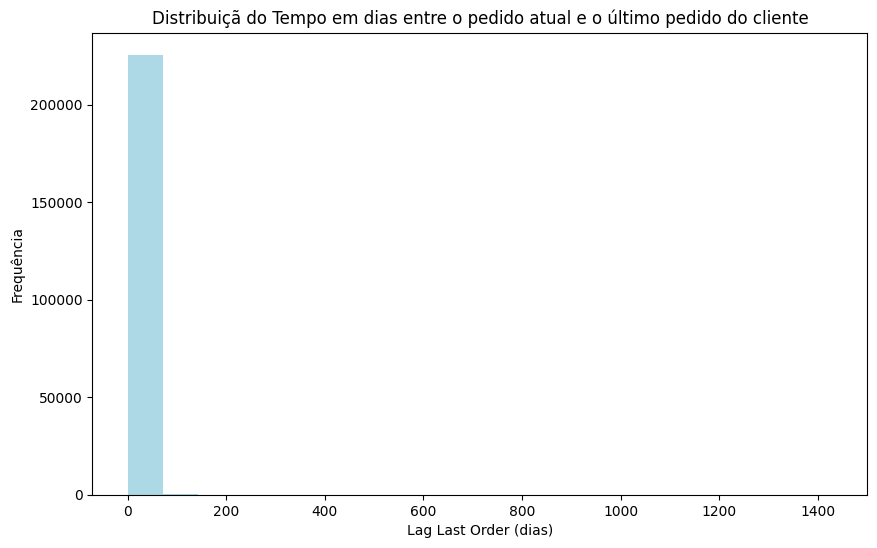

Estatísticas descritivas para lag_last_order:
count    226085.000000
mean          2.505275
std          11.985040
min           0.000000
1%            0.000000
3%            0.000000
5%            0.000000
50%           1.000000
80%           3.000000
85%           3.000000
90%           5.000000
95%           8.000000
99%          27.000000
max        1429.000000
Name: lag_last_order, dtype: float64


In [ ]:
percentiles = [0.01, 0.03, 0.05, 0.80, 0.85, 0.90, 0.95, 0.99]
#Estatísticas descritivas para lag_last_order
lag_last_order_stats = df_orders['lag_last_order'].describe(percentiles=percentiles)

#Plotando um histograma dos valores de lag_last_order
plt.figure(figsize=(10, 6))
plt.hist(df_orders['lag_last_order'], bins=20, color='lightblue')
plt.title('Distribuiçã do Tempo em dias entre o pedido atual e o último pedido do cliente')
plt.xlabel('Lag Last Order (dias)')
plt.ylabel('Frequência')
plt.show()

#Imprimindo as estatísticas descritivas
print("Estatísticas descritivas para lag_last_order:")
print(lag_last_order_stats)

É possivel perceber que 99% dos clientes realizaram o ultimo pedido em até 27 dias. após isso temos alguns outliers que realizaram o ultimo pedido em até 1429 dias. Interessante também e perceber que 85% dos clientes realizaram o ultimo pedido em até 3 dias, o que demonstra clientes muito ativos que realizam compra com alta frequencia.

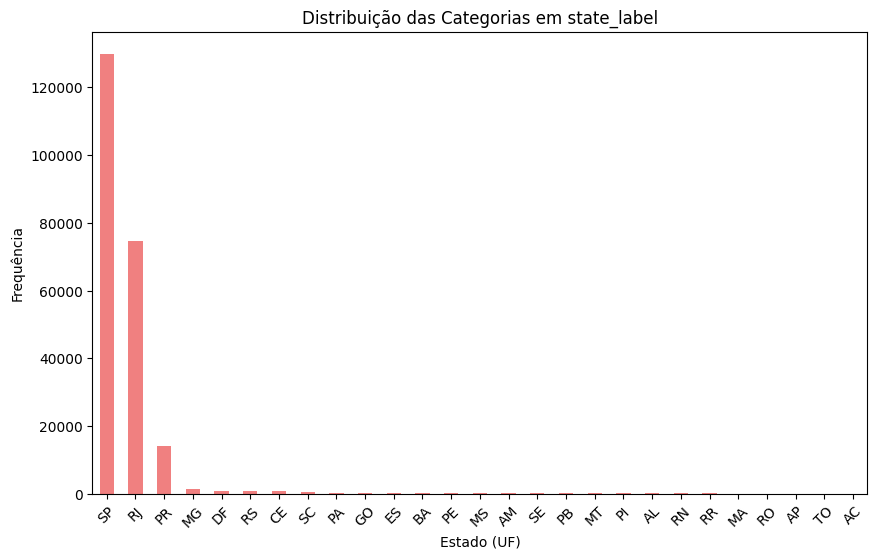

In [ ]:
#Contagem da frequência de cada categoria em state_label
state_label_counts = df_orders['state_label'].value_counts()

#Plotando um gráfico de barras para visualizar a distribuição
plt.figure(figsize=(10, 6))
state_label_counts.plot(kind='bar', color='lightcoral')
plt.title('Distribuição das Categorias em state_label')
plt.xlabel('Estado (UF)')
plt.ylabel('Frequência')
plt.xticks(rotation=45)  #Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()


Uma informação interessante, a grande parte dos pedidos foram feitos em SP e RJ e com muito menos pedios nos demais estados, um estudo interessante é tentar entender quais os motivos que fazem os demais estados terem pouco uso do aplicativo, falta de restaurantes? ou motoristas parceiros? falta de campanhas de marketing para essas localidades?

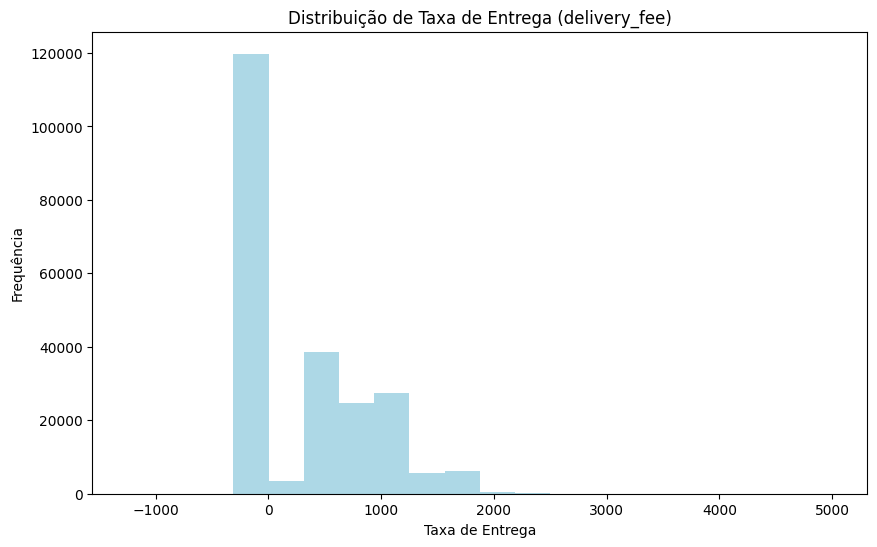

Estatísticas descritivas para delivery_fee:
count    226269.000000
mean        405.418965
std         504.026635
min       -1247.500000
25%           0.000000
50%           0.000000
75%         748.750000
max        5000.000000
Name: delivery_fee, dtype: float64


In [ ]:
#Estatísticas descritivas para delivery_fee
delivery_fee_stats = df_orders['delivery_fee'].describe()

#Plotando um histograma das taxas de entrega
plt.figure(figsize=(10, 6))
plt.hist(df_orders['delivery_fee'], bins=20, color='lightblue')
plt.title('Distribuição de Taxa de Entrega (delivery_fee)')
plt.xlabel('Taxa de Entrega')
plt.ylabel('Frequência')
plt.show()

#Imprimindo as estatísticas descritivas
print("Estatísticas descritivas para delivery_fee:")
print(delivery_fee_stats)

A primeiro momento eu tinha identificado este grafico e considerado que a maior parte dos valores eram negativas, e a justificativa para isso era que o ifood lançava valores negativos quando arcava com a taxa de entrega. Porem verificando mais afundo na parte de processamento eu verifiquei que só existe uma ocorrencia de valor negativo, e que a divisão de bins fez esse falso grafico acima.

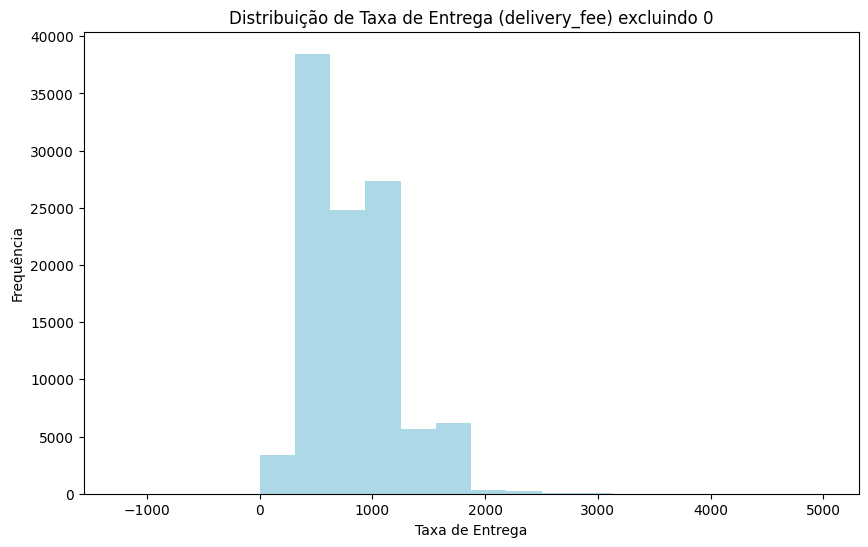

In [ ]:
# Plotando um histograma excluindo os valores de 0
plt.figure(figsize=(10, 6))
plt.hist(df_orders[df_orders['delivery_fee'] != 0]['delivery_fee'], bins=20, color='lightblue')
plt.title('Distribuição de Taxa de Entrega (delivery_fee) excluindo 0')
plt.xlabel('Taxa de Entrega')
plt.ylabel('Frequência')
plt.show()


Quando eu excluo do grafico os valores = 0 que representavam aquela barra maior, a divisão de bins fica correta, demonstrando apenas uma ocorrencia com taxa de -1247.500

## Analisando Marketing

In [ ]:
df_marketing

,account_id,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date
0,7c0450e7-a806-4208-8449-e4269a27e6b5,2020-02-02,Inactive,Inactive,8,2020-02-28
1,16d0afba-00b8-427a-ba1f-2e397a9fbb54,2016-05-17,Churn,Active,457,2017-03-19
2,61c051ee-d37c-45c6-8c22-c236db3b62b7,2018-09-02,Active,Active,206,2018-09-02
3,82e48692-e4fa-494e-b03e-6815a819b7b1,2017-11-10,Reactivated,Churn,47,2018-05-01
4,382af025-14c8-4ba9-b62f-deddd6f25789,2019-08-05,Inactive,Inactive,66,2019-08-12
...,...,...,...,...,...,...
20244,43ca9ecf-4a84-46c0-bddc-08500cc2dadd,2015-08-03,Inactive,Inactive,1186,2015-08-17
20245,bba67e7e-6760-4f0d-846c-b85af925acf1,2019-03-17,Inactive,Inactive,4,2019-12-11
20246,d0ceeec4-3cc6-4878-acf9-a0f4aeb95f66,2020-01-07,Inactive,Inactive,2,2020-02-13
20247,e0ec291a-cd2f-428a-a6ab-5f88b5d141dd,2017-08-12,Inactive,Inactive,263,2017-08-12


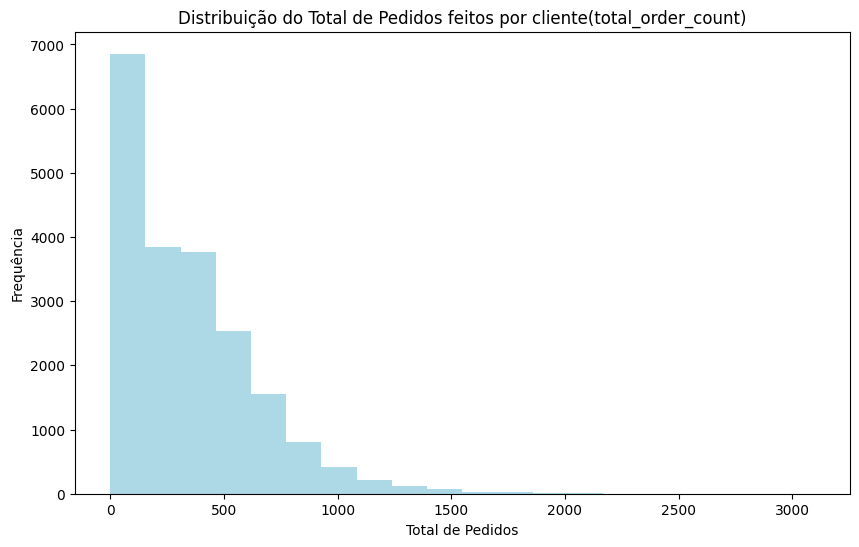

Estatísticas descritivas para total_order_count:
count    20249.000000
mean       341.321201
std        303.150112
min          0.000000
1%           1.000000
3%           3.000000
5%           6.000000
50%        286.000000
80%        561.000000
85%        637.000000
90%        736.000000
95%        900.000000
99%       1329.040000
max       3098.000000
Name: total_order_count, dtype: float64


In [ ]:
percentiles = [0.01, 0.03, 0.05, 0.80, 0.85, 0.90, 0.95, 0.99]

#Estatísticas descritivas para total_order_count
total_order_count_stats = df_marketing['total_order_count'].describe(percentiles=percentiles)

#Plotando um histograma do número de pedidos
plt.figure(figsize=(10, 6))
plt.hist(df_marketing['total_order_count'], bins=20, color='lightblue')
plt.title('Distribuição do Total de Pedidos feitos por cliente(total_order_count)')
plt.xlabel('Total de Pedidos')
plt.ylabel('Frequência')
plt.show()

#Imprimindo as estatísticas descritivas
print("Estatísticas descritivas para total_order_count:")
print(total_order_count_stats)

Analisando o numero total de pedidos feito por cliente, 50% dos clientes fizeram até 286 pedidos. quando pegamos 99% temos até 1329 pedidos, com alguns outliers indo até 3098. provavelmente precise trunkar esta feature em 99%

<ipython-input-128-f28855296c04>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_marketing['registration_date'], shade=True, color='lightblue')


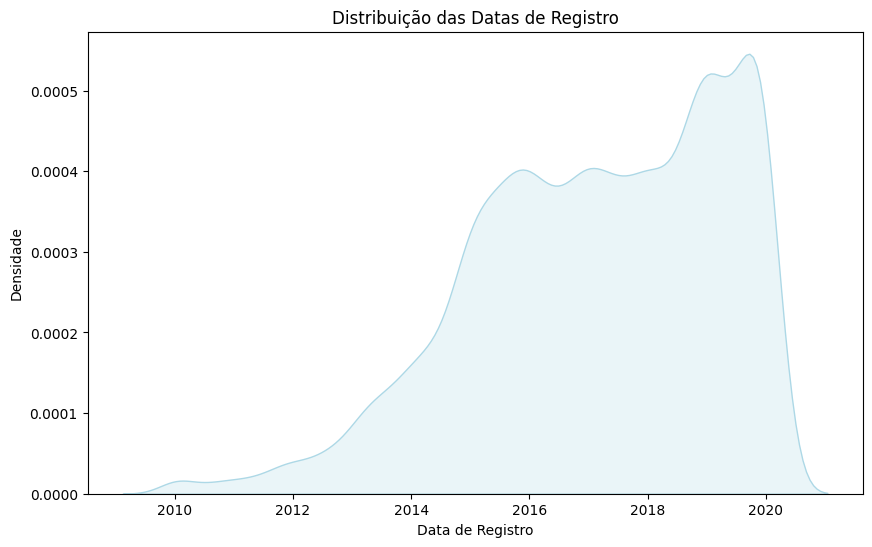

In [ ]:
import seaborn as sns
#Transformando a coluna 'registration_date' em datetime
df_marketing['registration_date'] = pd.to_datetime(df_marketing['registration_date'])

#Criando um KDE plot das datas de registro
plt.figure(figsize=(10, 6))
sns.kdeplot(df_marketing['registration_date'], shade=True, color='lightblue')
plt.title('Distribuição das Datas de Registro')
plt.xlabel('Data de Registro')
plt.ylabel('Densidade')
plt.show()


É possivel perceber que a distribuição da data de registro aumenta com o passar dos anos, demonstrando um crescimento no numero de usuarios.

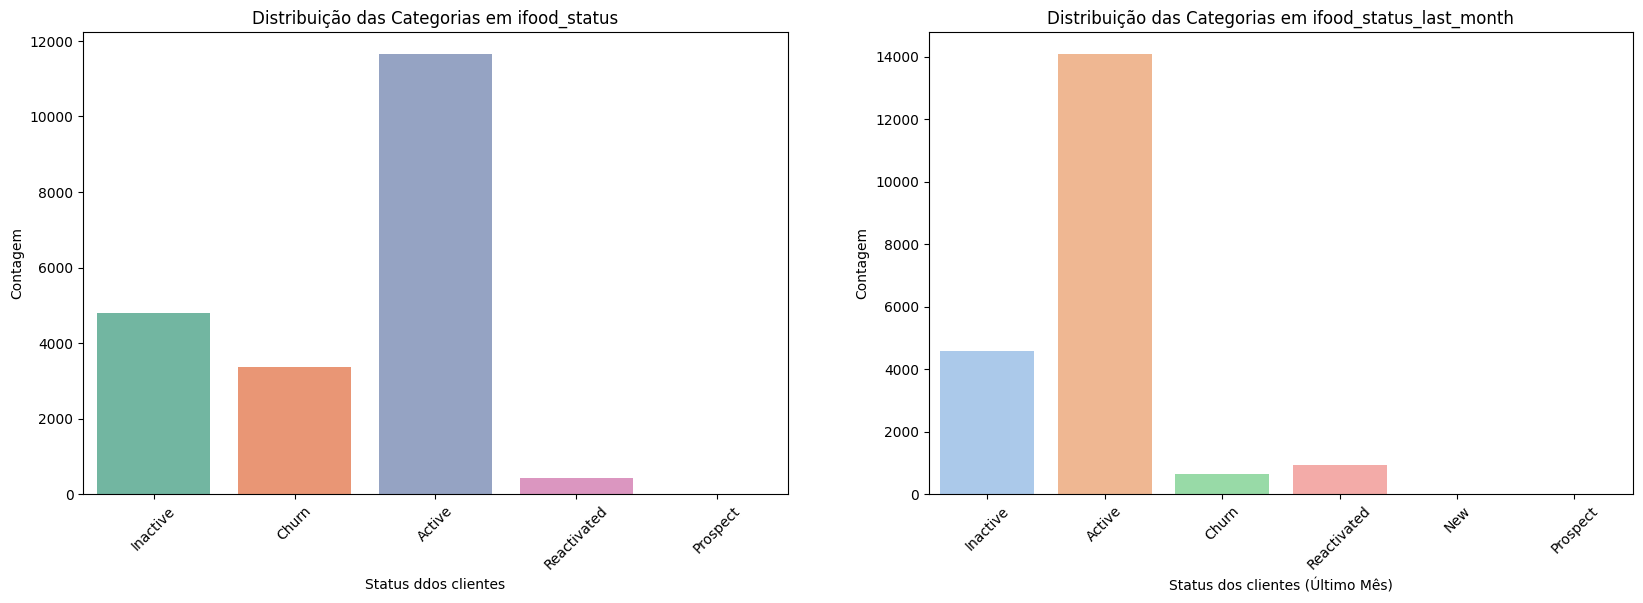

In [ ]:
#Criando um count plot das categorias em ifood_status
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_marketing, x='ifood_status', palette='Set2')
plt.title('Distribuição das Categorias em ifood_status')
plt.xlabel('Status ddos clientes')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  #Rotaciona os rótulos do eixo x para melhor legibilidade


#Criando um gráfico de contagem (countplot) das categorias em ifood_status_last_month
plt.subplot(1, 2, 2)
sns.countplot(data=df_marketing, x='ifood_status_last_month', palette='pastel')
plt.title('Distribuição das Categorias em ifood_status_last_month')
plt.xlabel('Status dos clientes (Último Mês)')
plt.ylabel('Contagem')
plt.xticks(rotation=45)  #Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

Existe uma boa parcela de clientes inativo que não realizaram uma compra nos ultimos 2 meses, também existe um bom numero de clientes em churn ou seja não realizaram uma compra ainda no mes atual. Em sua maioria temos clientes ativos, e também possuimos alguns clientes que reativados que voltaram a realizar uma compra. Interessante saber que o ifood considera um cliente Inativo quando ele esta 2 meses sem realizar uma compra, e em churn se não realizou nenhuma compra no ultimo mes.

Quando olhamos para o ultimo mês temos um numero muito menor de churn se comparado com o mês atual, acredito que isso casa muito com a redução do numero de pedidos identificados na analise de orders, provavelmente pela pandemia o numero de churn e clientes inativos foram aumentando com o passar dos meses.

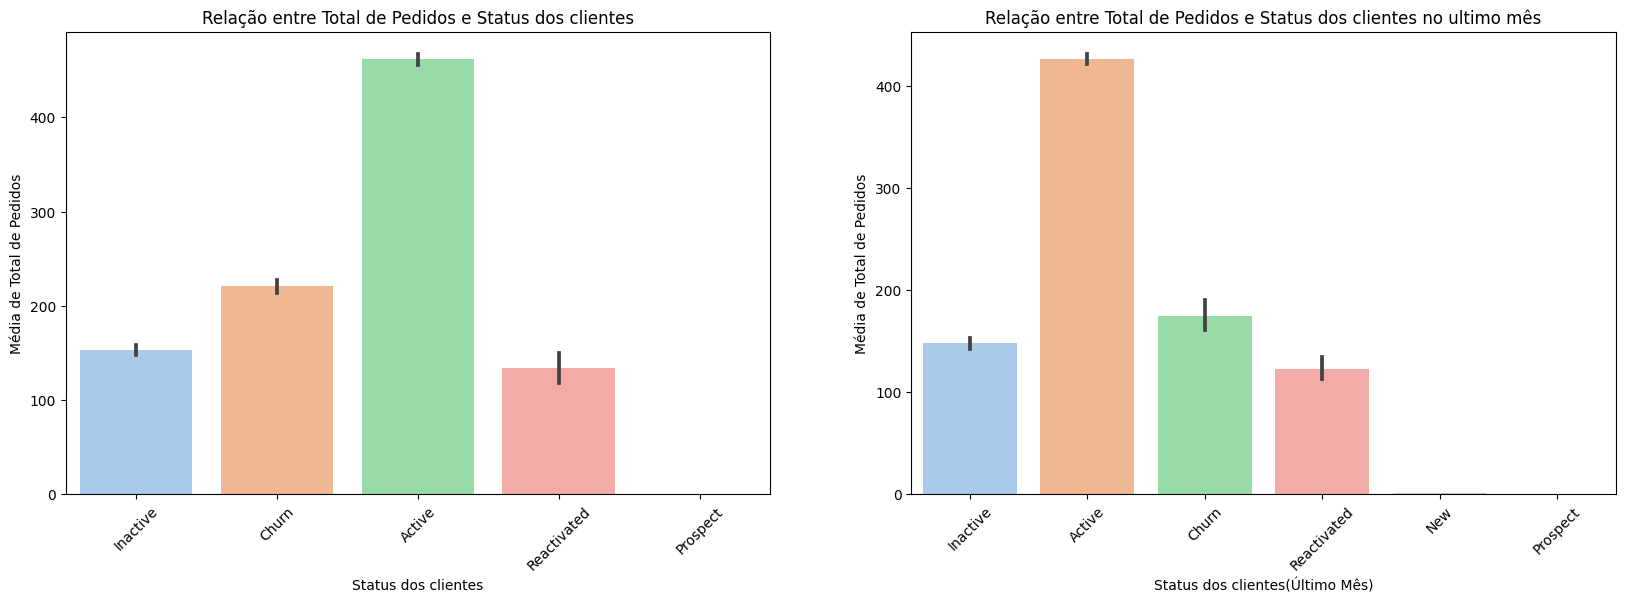

In [ ]:
#Análisando estatística da relação entre total_order_count e ifood_status
relation_analysis = df_marketing.groupby('ifood_status')['total_order_count'].describe()

#Plotando um gráfico de barras para a média de total_order_count por ifood_status
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=df_marketing, x='ifood_status', y='total_order_count', estimator='mean', palette='pastel')
plt.title('Relação entre Total de Pedidos e Status dos clientes')
plt.xlabel('Status dos clientes')
plt.ylabel('Média de Total de Pedidos')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade


#Plotando um gráfico de barras para a média de total_order_count por ifood_status_last_month
plt.subplot(1, 2, 2)
sns.barplot(data=df_marketing, x='ifood_status_last_month', y='total_order_count', estimator='mean', palette='pastel')
plt.title('Relação entre Total de Pedidos e Status dos clientes no ultimo mês')
plt.xlabel('Status dos clientes(Último Mês)')
plt.ylabel('Média de Total de Pedidos')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()


Quando olhamos os status pela media de pedidos é possivel ver que os clientes que estão em churn e inativos realizaam menos de 250 pedidos em media, já os clientes ativos realizam mais de 400 pedidos em media, e clientes reativados gastaram 150 pedidos. Acredito que boa parcela de clientes inativos e de churn são clientes que na verdade compram com menor frequencia por diversos fatores.

##Junção de orders e marketing e analises mais profundas

In [ ]:
#Realizando uma junção (merge) dos DataFrames com base na coluna 'account_id'
merged_df = df_orders.merge(df_marketing, on='account_id')


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226269 entries, 0 to 226268
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   order_id                 226269 non-null  object         
 1   order_shift              226269 non-null  object         
 2   order_origin             226269 non-null  object         
 3   delivery_fee             226269 non-null  float64        
 4   scheduled                226269 non-null  bool           
 5   total_amount             226269 non-null  float64        
 6   subsidy_amount           226269 non-null  float64        
 7   device_platform          226269 non-null  object         
 8   device_type              226269 non-null  object         
 9   device_app_version       221834 non-null  object         
 10  centroid_id              226269 non-null  object         
 11  state_label              226269 non-null  object         
 12  ci

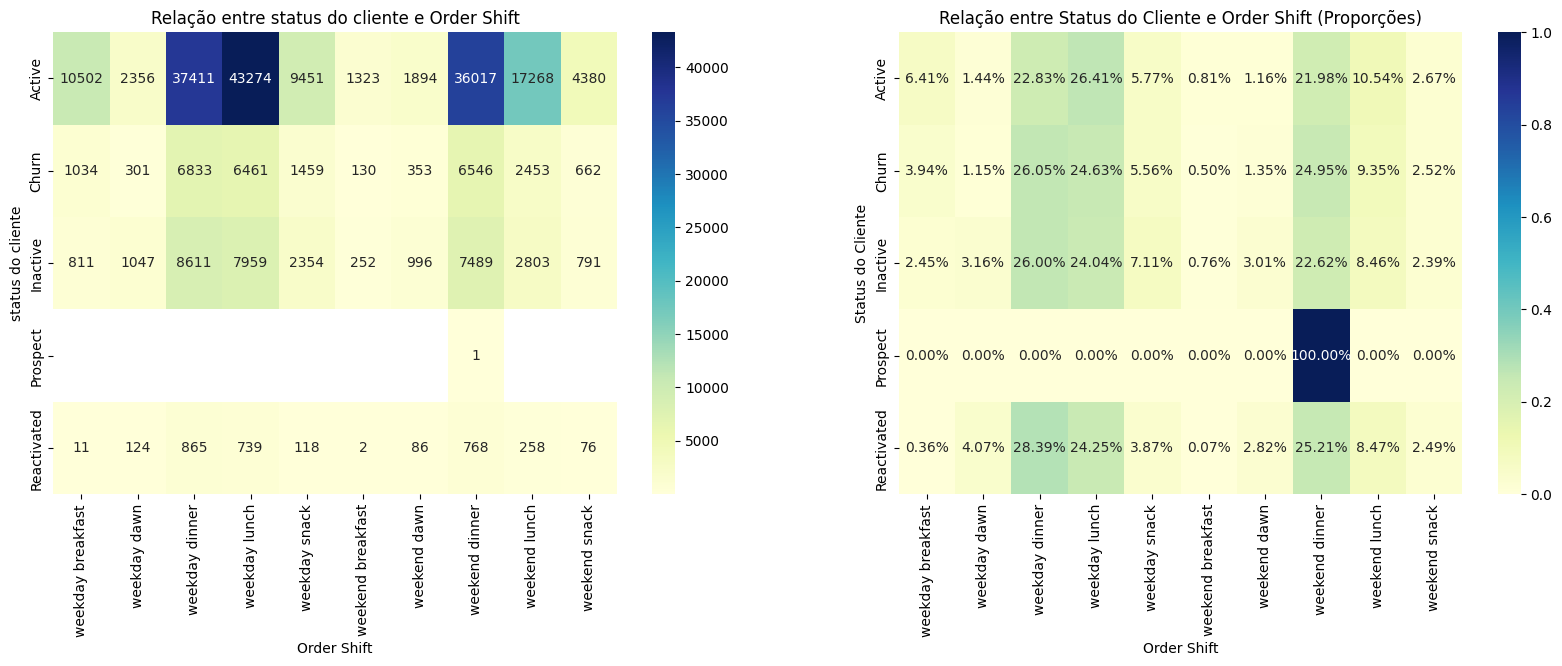

In [ ]:
#Análisando a relação entre Ifood_status e order_shift
relation_analysis = merged_df.groupby(['ifood_status', 'order_shift']).size().unstack()

#Plotando um heatmap para visualizar a relação entre as variáveis
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.heatmap(relation_analysis, cmap='YlGnBu', annot=True, fmt='g')  #Usando 'g' para formatar os números
plt.title('Relação entre status do cliente e Order Shift')
plt.xlabel('Order Shift')
plt.ylabel('status do cliente')


plt.subplot(1, 2, 2)
#Criando uma tabela de contingência (crosstab) entre Ifood_status e order_shift
contingency_table = pd.crosstab(index=merged_df['ifood_status'], columns=merged_df['order_shift'], normalize='index')

#Plotando um heatmap para visualizar as proporções entre as variáveis
sns.heatmap(contingency_table, cmap='YlGnBu', annot=True, fmt=".2%", cbar=True)  # Usando '.2%' para formatar como proporção
plt.title('Relação entre Status do Cliente e Order Shift (Proporções)')
plt.xlabel('Order Shift')
plt.ylabel('Status do Cliente')
plt.show()



Já era esperado que clientes ativos tivessem um numero maior de pedidos, porem eu esperava encontrar alguma diferença de comportamento de compra com base no status do cliente, como por exemplo: clientes em churn tem um maior numero de pedidos nos fins de semana enquanto clientes ativos compram com a mesma proporção na semana e no fim de semana. Porem não existe nenhuma diferença expressiva pelo status do cliente.

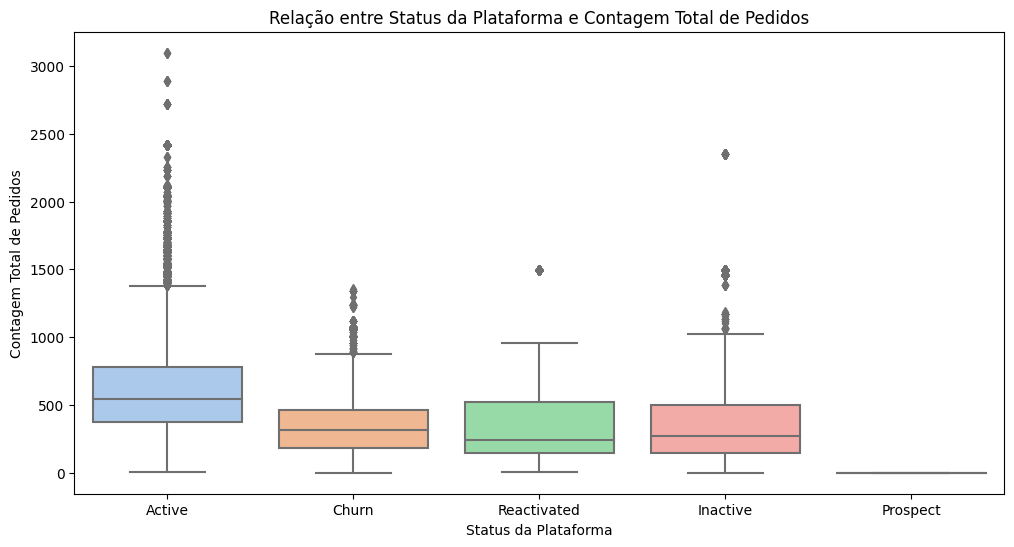

In [ ]:
#Plotando um boxplot para visualizar a relação entre ifood_status e total_order_count
plt.figure(figsize=(12, 6))
sns.boxplot(x='ifood_status', y='total_order_count', data=merged_df, palette='pastel')
plt.title('Relação entre Status da Plataforma e Contagem Total de Pedidos')
plt.xlabel('Status da Plataforma')
plt.ylabel('Contagem Total de Pedidos')
plt.show()

Aqui o comportamento é o esperado, clientes mais ativos possuem um numero maior de pedidos, interessante ver que os clientes inativos também possuem um numero consideravel de pedidos, mas por algum motivo deixaram de comprar na plataforma.

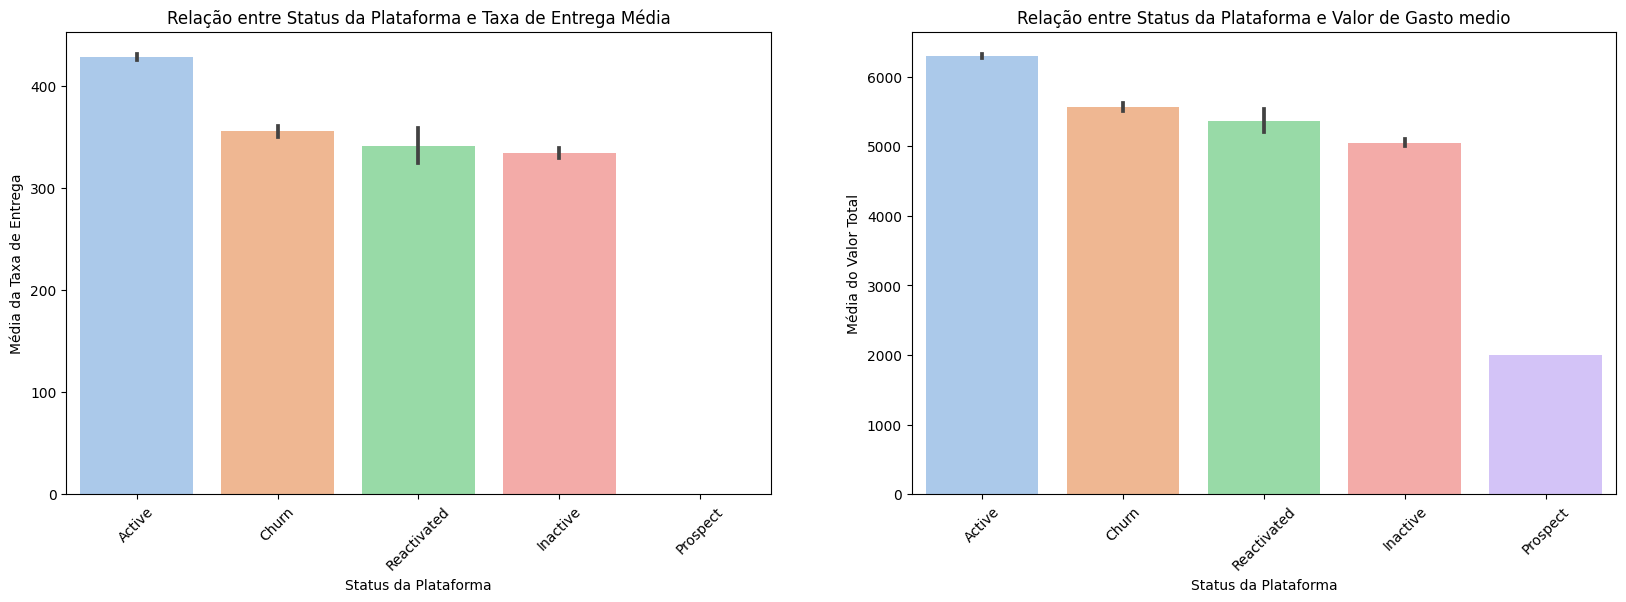

In [ ]:
#Análisando a relação entre ifood_status e delivery_fee
relation_analysis = merged_df.groupby('ifood_status')['delivery_fee'].describe()

#Plotando um gráfico de barras para a média de delivery_fee por ifood_status
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=merged_df, x='ifood_status', y='delivery_fee', estimator='mean', palette='pastel')
plt.title('Relação entre Status da Plataforma e Taxa de Entrega Média')
plt.xlabel('Status da Plataforma')
plt.ylabel('Média da Taxa de Entrega')
plt.xticks(rotation=45)  #Rotaciona os rótulos do eixo x para melhor legibilidade

plt.subplot(1, 2, 2)
#Análisando a relação entre ifood_status e total_amount
relation_analysis = merged_df.groupby('ifood_status')['total_amount'].describe()

#Plotando um gráfico de barras para a média de total_amount por ifood_status
sns.barplot(data=merged_df, x='ifood_status', y='total_amount', estimator='mean', palette='pastel')
plt.title('Relação entre Status da Plataforma e Valor de Gasto medio')
plt.xlabel('Status da Plataforma')
plt.ylabel('Média do Valor Total')
plt.xticks(rotation=45)  #Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

Novamente o esperado aqui, clientes mais ativos pagam maiores taxas de entrega e gastam valores maiores por compra do que os demais status do cliente.

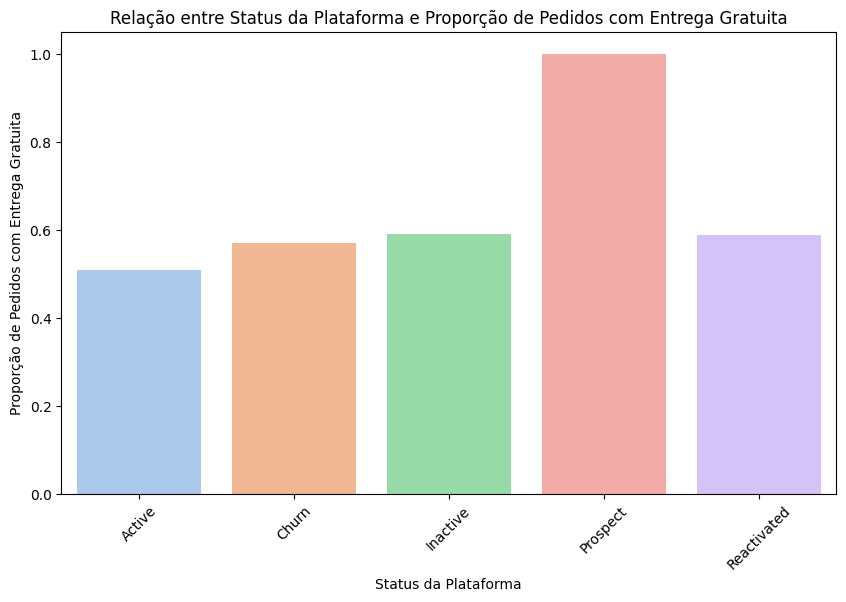

In [ ]:
#Calculando a proporção de pedidos com entrega gratuita para cada categoria de ifood_status
proporcao_entrega_gratuita = merged_df.groupby('ifood_status')['has_free_delivery'].mean()

#Plotando um gráfico de barras para visualizar a proporção de pedidos com entrega gratuita por ifood_status
plt.figure(figsize=(10, 6))
sns.barplot(x=proporcao_entrega_gratuita.index, y=proporcao_entrega_gratuita.values, palette='pastel')
plt.title('Relação entre Status da Plataforma e Proporção de Pedidos com Entrega Gratuita')
plt.xlabel('Status da Plataforma')
plt.ylabel('Proporção de Pedidos com Entrega Gratuita')
plt.xticks(rotation=45)  #Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

Aqui é uma analise interessante, clientes ativos fazem menos pedidos com entrega gratuita, quanto mais critico o status do cliente maior o numero de pedidos com entrega gratuita, também podemos ver que clientes reativados possuem um bom numero de entregas gratuitas o que muito provavelmente é o aplicativo dando entrega gratis para trazer este cliente de volta para a plataforma. No caso do prospect temos apenas 1 ocorrencia então não tem peso esta informação.

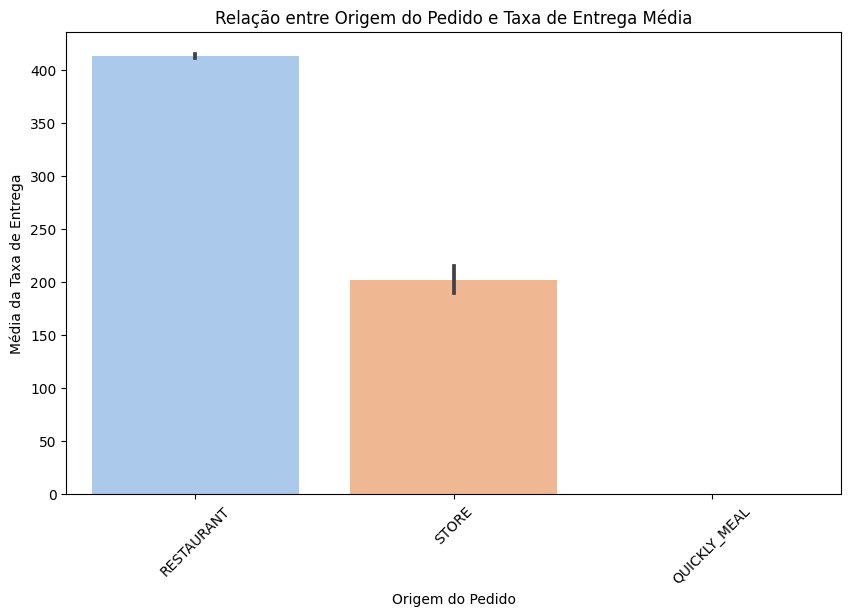

In [ ]:
#Análise estatística da relação entre order_origin e delivery_fee
relation_analysis = merged_df.groupby('order_origin')['delivery_fee'].describe()

#Plotando um gráfico de barras para a média de delivery_fee por order_origin
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='order_origin', y='delivery_fee', estimator='mean', palette='pastel')
plt.title('Relação entre Origem do Pedido e Taxa de Entrega Média')
plt.xlabel('Origem do Pedido')
plt.ylabel('Média da Taxa de Entrega')
plt.xticks(rotation=45)  #Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

<ipython-input-138-80d016e830e5>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='registration_date', y='total_order_count', data=df_analysis, palette='pastel')


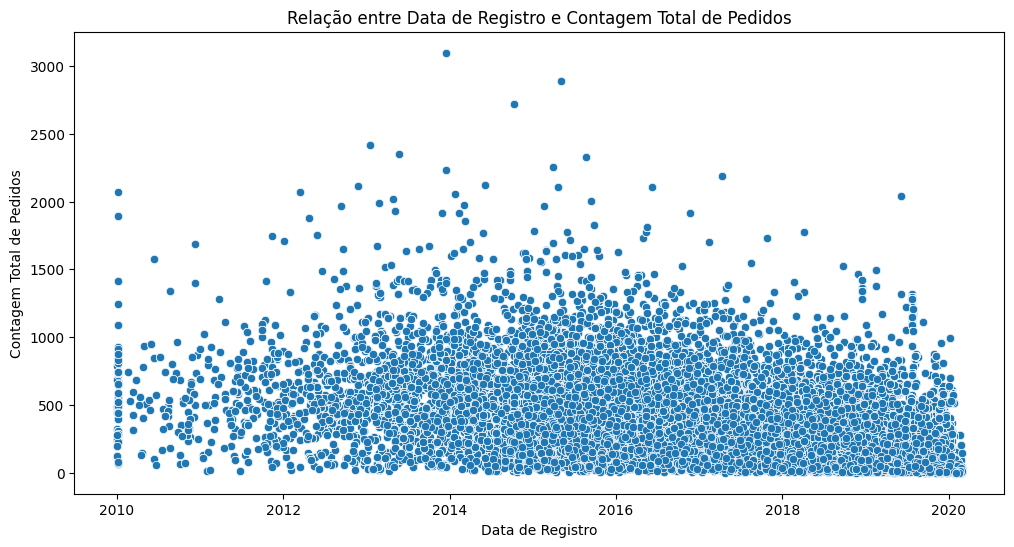

In [ ]:
#Fazendo uma cópia do DataFrame merged_df para garantir integridade dos dados
df_analysis = merged_df.copy()

#Convertendo a coluna 'registration_date' para o formato de data
df_analysis['registration_date'] = pd.to_datetime(df_analysis['registration_date'], errors='coerce')

#Removendo linhas com valores nulos na coluna 'registration_date'
df_analysis = df_analysis.dropna(subset=['registration_date'])

#Plotando um gráfico de dispersão para visualizar a relação entre registration_date e total_order_count
plt.figure(figsize=(12, 6))
sns.scatterplot(x='registration_date', y='total_order_count', data=df_analysis, palette='pastel')
plt.title('Relação entre Data de Registro e Contagem Total de Pedidos')
plt.xlabel('Data de Registro')
plt.ylabel('Contagem Total de Pedidos')
plt.show()

Temos um declinio para os clientes mais novos (o que ja é esperado, porem bem mais sutil do que imaginei) não posso inferir nada aqui, alem de achar interessante o quão ativo são os clientes mais recentes.

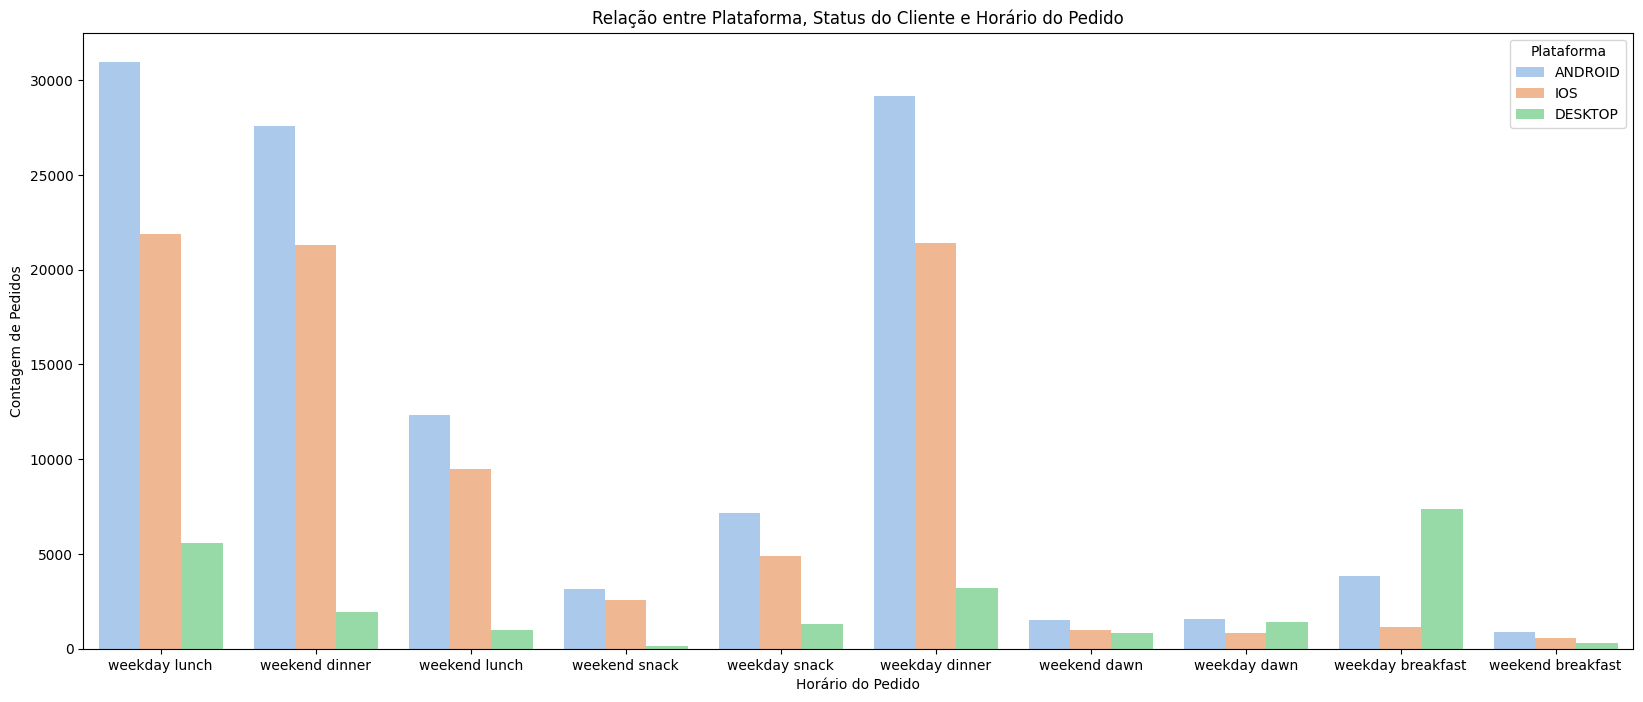

In [ ]:
#Plotando um gráfico de barras agrupado para visualizar a relação entre platform_status, device_platform e order_shift
plt.figure(figsize=(20, 8))
sns.countplot(x='order_shift', hue='device_platform', data=df_analysis, palette='pastel')
plt.title('Relação entre Plataforma, Status do Cliente e Horário do Pedido')
plt.xlabel('Horário do Pedido')
plt.ylabel('Contagem de Pedidos')
plt.legend(title='Plataforma')
plt.show()

Aqui a distribuição segue semelhante ao que vi quando olhei para o numero de pedidos por plataforma, porem temos uma descoberta interessante, o numero de pedidos durante a semana no café da manha é maior em desktops, e durante a madrugada o desktop possui um numero de pedidos maior que iphone.

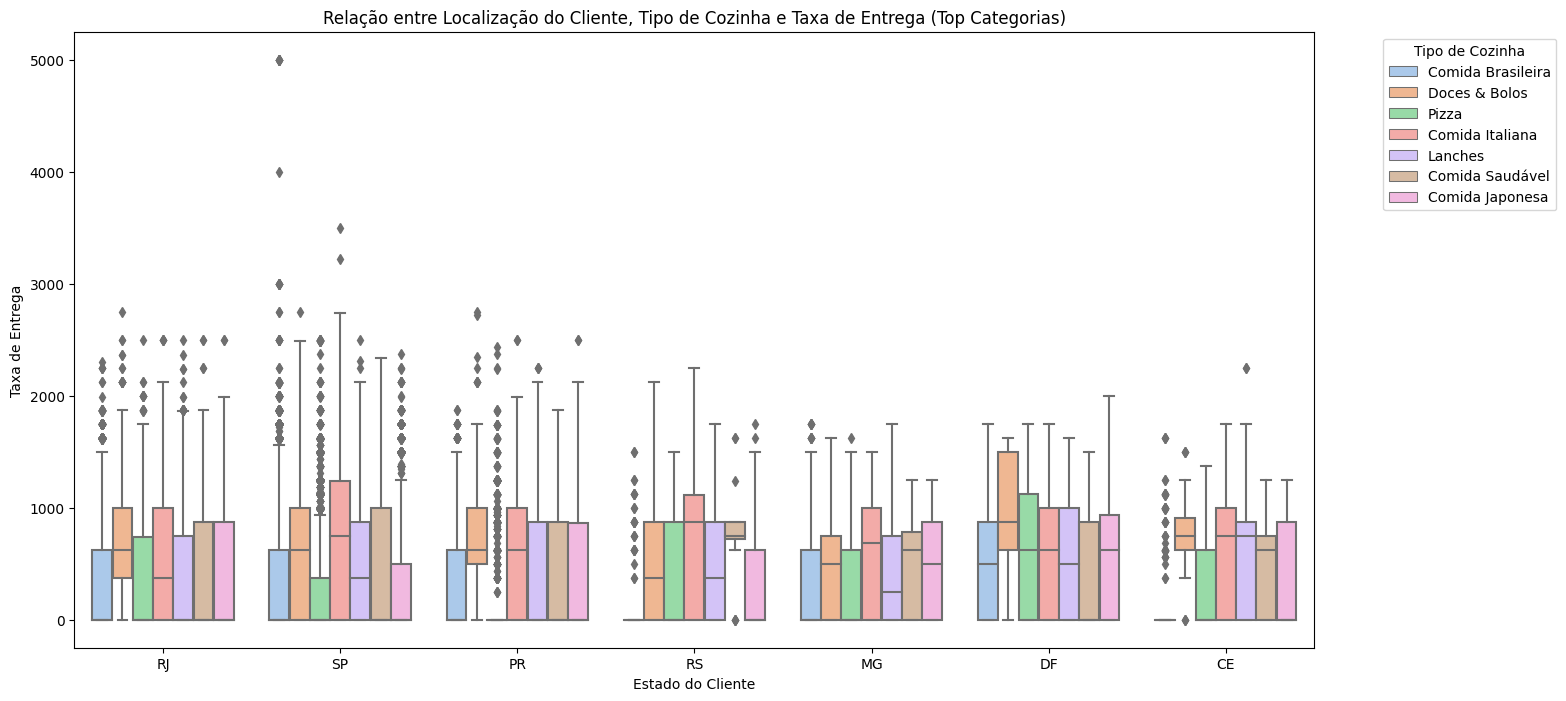

In [ ]:
#Filtrando apenas as colunas relevantes para a análise
df_location_cuisine_fee = df_analysis[['state_label', 'dish_type', 'delivery_fee']]

#Filtrando apenas as linhas com taxa de entrega não negativa
df_location_cuisine_fee = df_location_cuisine_fee[df_location_cuisine_fee['delivery_fee'] >= 0]

#Definindo o número de top categorias a serem mostradas
top_categories = 7

#Obtendo as top N categorias para state_label e dish_type
top_states = df_location_cuisine_fee['state_label'].value_counts().nlargest(top_categories).index
top_dish_types = df_location_cuisine_fee['dish_type'].value_counts().nlargest(top_categories).index

#Filtrando o DataFrame para incluir apenas as top N categorias
df_top_categories = df_location_cuisine_fee[df_location_cuisine_fee['state_label'].isin(top_states) & df_location_cuisine_fee['dish_type'].isin(top_dish_types)]

#Plotando um gráfico de caixa para visualizar a relação entre localização do cliente, tipo de cozinha e taxa de entrega
plt.figure(figsize=(16, 8))
sns.boxplot(x='state_label', y='delivery_fee', hue='dish_type', data=df_top_categories, palette='pastel')
plt.title('Relação entre Localização do Cliente, Tipo de Cozinha e Taxa de Entrega (Top Categorias)')
plt.xlabel('Estado do Cliente')
plt.ylabel('Taxa de Entrega')
plt.legend(title='Tipo de Cozinha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Olhando a relação de taxa de entrega por tipo de comida e estado, é possivel perceber que doces e bolos tem uma taxa de entrega maior que os demais tipos de comida, comida italiana se destaca tambem com uma taxa de entrega maior. já como as menores taxas temos comida brasileira.

<ipython-input-141-61fd75798b52>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='order_shift', y='delivery_fee', hue='ifood_status', data=df_status_shift_fee, ci=None, palette='pastel')


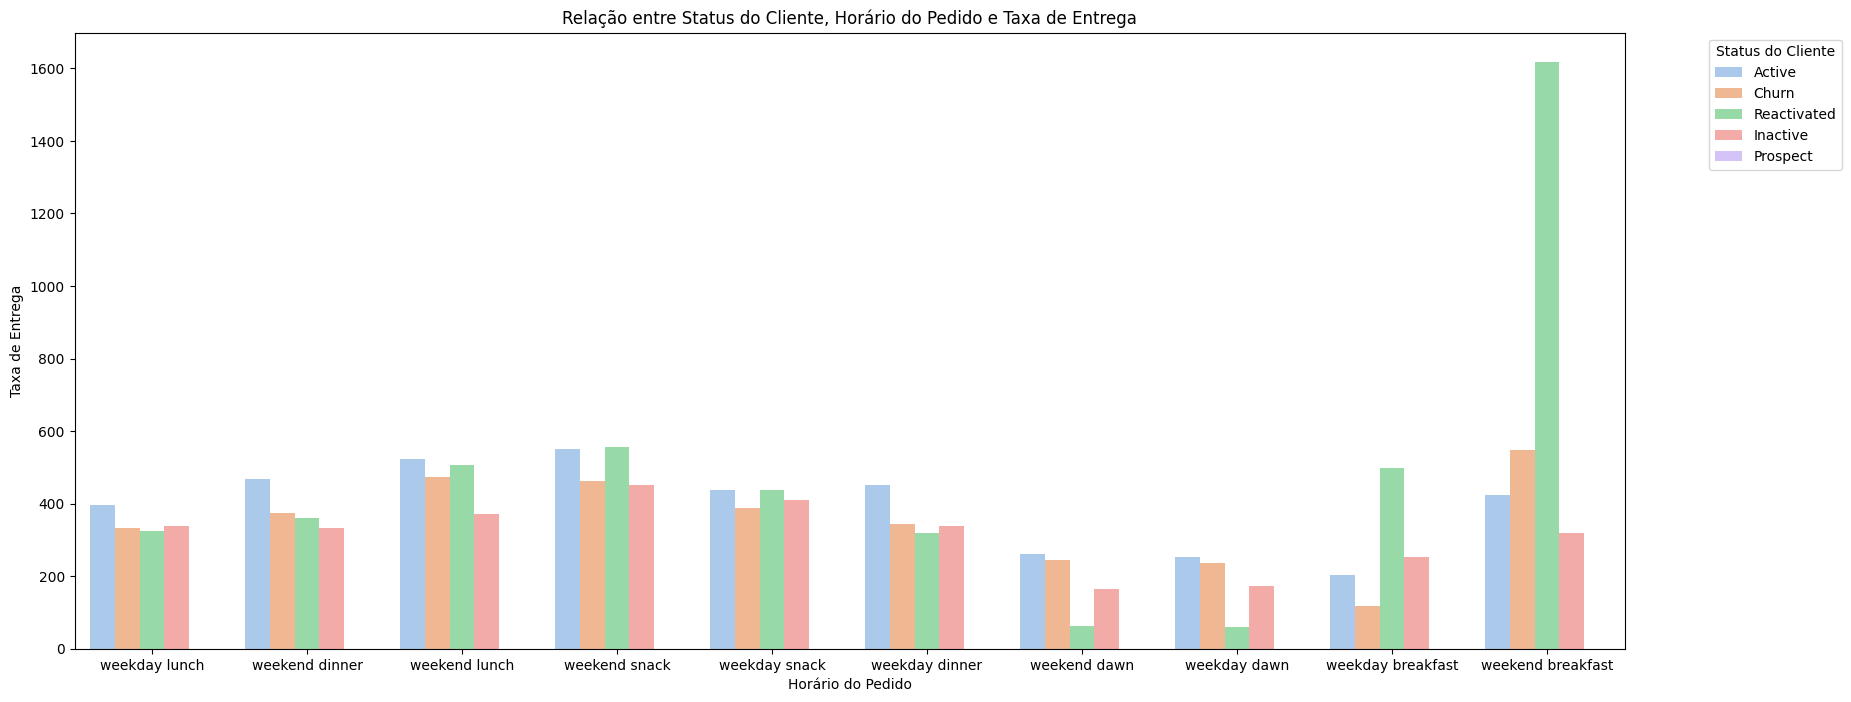

In [ ]:
#Filtrando apenas as colunas relevantes para a análise
df_status_shift_fee = df_analysis[['ifood_status', 'order_shift', 'delivery_fee']]

#Filtrando apenas as linhas com taxa de entrega não negativa
df_status_shift_fee = df_status_shift_fee[df_status_shift_fee['delivery_fee'] >= 0]

#Plotando um gráfico de barras agrupado para visualizar a relação entre status do cliente, horário do pedido e taxa de entrega
plt.figure(figsize=(20, 8))
sns.barplot(x='order_shift', y='delivery_fee', hue='ifood_status', data=df_status_shift_fee, ci=None, palette='pastel')
plt.title('Relação entre Status do Cliente, Horário do Pedido e Taxa de Entrega')
plt.xlabel('Horário do Pedido')
plt.ylabel('Taxa de Entrega')
plt.legend(title='Status do Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Na maior parte dos horarios os clientes ativos são os que pagam uma maior taxa de entrega, com exceção do periodo de café da manha, onde clientes reativados na plataforma pagam um valor muito superior, a principio não consigo pensar no por que disto.

<ipython-input-142-a48eb07acebf>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='dish_type', y='total_amount', hue='ifood_status', data=df_cuisine_status_amount, ci=None, palette='pastel')


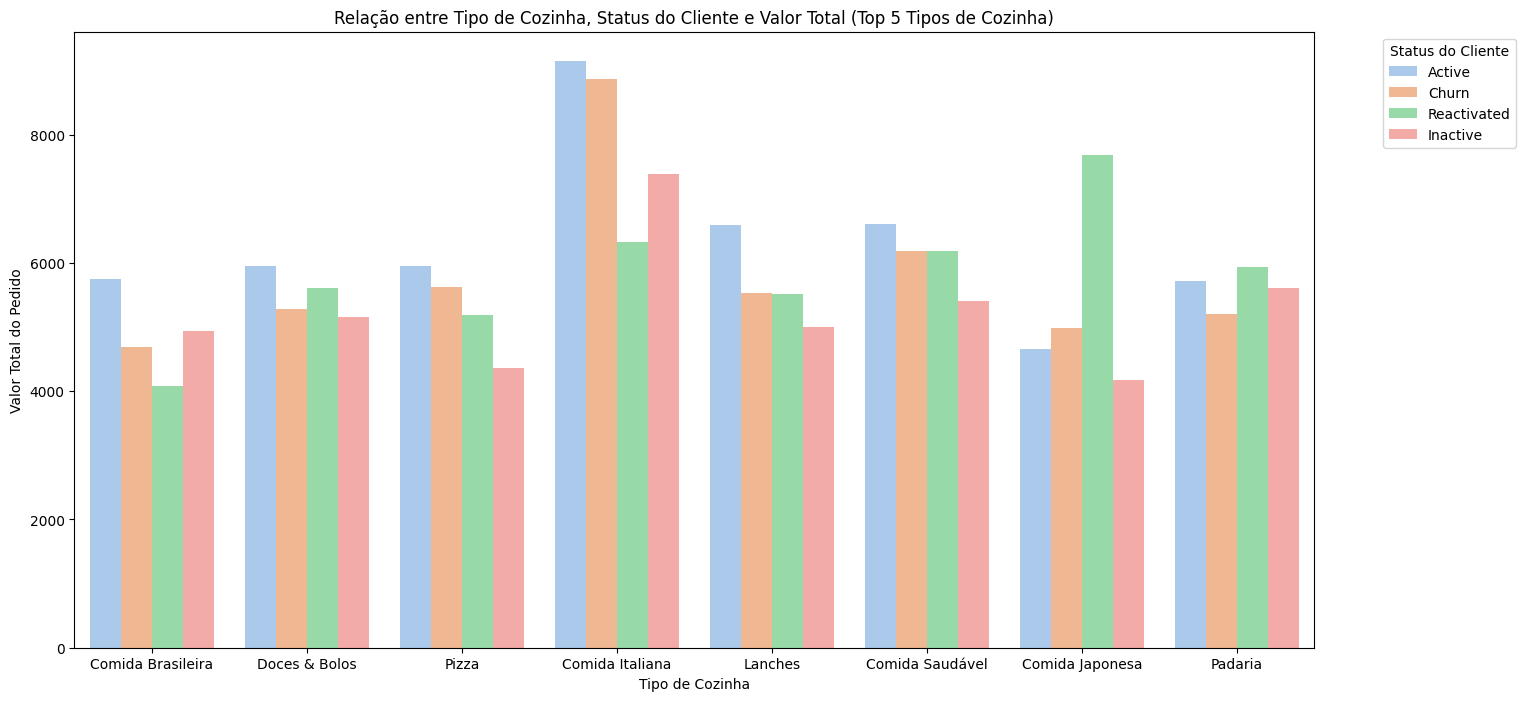

In [ ]:
#Filtrando apenas as colunas relevantes para a análise
df_cuisine_status_amount = df_analysis[['dish_type', 'ifood_status', 'total_amount']]

#Obtendo os 5 tipos de cozinha com mais pedidos
top_dish_types = df_cuisine_status_amount['dish_type'].value_counts().nlargest(8).index

#Filtrando o DataFrame para incluir apenas os 5 tipos de cozinha com mais pedidos
df_cuisine_status_amount = df_cuisine_status_amount[df_cuisine_status_amount['dish_type'].isin(top_dish_types)]

#Plotando um gráfico de barras agrupado para visualizar a relação entre tipo de cozinha, status do cliente e valor total
plt.figure(figsize=(16, 8))
sns.barplot(x='dish_type', y='total_amount', hue='ifood_status', data=df_cuisine_status_amount, ci=None, palette='pastel')
plt.title('Relação entre Tipo de Cozinha, Status do Cliente e Valor Total (Top 5 Tipos de Cozinha)')
plt.xlabel('Tipo de Cozinha')
plt.ylabel('Valor Total do Pedido')
plt.legend(title='Status do Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Clientes reativados gastão mais com comida japonesa e um pouco mais com doces e bolos e padarias. Isso me faz presupor que clientes reativados são aqueles cliente que utilizam o aplicativo de forma menos frequente quando querem pedir algum tipo de comida diferenciada.

#Pre-Processamento para clusterização  

###Removendo colunas que não serão uteis para o modelo

In [ ]:
#Fazendo uma copia de merged_df
df_cluster = merged_df.copy()

#Removendo colunas que não serão uteis na clusterização
df_cluster.drop(columns= ['tempo_conclusao','device_app_version','centroid_id','district','customer_long','customer_lat','restaurant_id','group_id','merchant_centroid_id','merchant_state','merchant_city','merchant_district','merchant_zipcode','merchant_long','merchant_lat'], inplace=True)


###Verificando os dados nulos

In [ ]:
#Verificando os nulos de Confirmed_date
df_cluster[df_cluster['confirmed_date'].isnull()][['confirmed_date','concluded_date']]

,confirmed_date,concluded_date
103,NaT,2020-02-18 12:42:37
14722,NaT,2020-02-18 18:31:31
29218,NaT,2020-02-18 12:51:54
38546,NaT,2020-02-18 18:33:34
40673,NaT,2020-02-18 18:36:29
59158,NaT,2020-02-18 18:36:40
67233,NaT,2020-02-18 12:48:22
80501,NaT,2020-02-18 18:36:30
97240,NaT,2020-02-18 18:34:33
165265,NaT,2020-02-18 18:31:31


São poucos dados nulos e todos são do mesmo dia, muito provavelmente foi um erro do sistema, irei optar por remover.

In [ ]:
#Removendo as linhas com valores nulos na coluna 'confirmed_date'
df_cluster.dropna(subset=['confirmed_date'], inplace=True)

In [ ]:
#verificando concluded_date
df_cluster[df_cluster['concluded_date'].isnull()][['confirmed_date','concluded_date']]

,confirmed_date,concluded_date
22705,2020-05-30 10:50:53,NaT
93304,2020-08-13 08:34:31,NaT
158021,2020-06-01 08:55:51,NaT
160824,2020-08-13 08:24:25,NaT


são somente 4 linhas, provavelmente outros erros pontuais e irei remover.

In [ ]:
#Removendo as linhas com valores nulos na coluna 'concluded_date'
df_cluster.dropna(subset=['concluded_date'], inplace=True)

In [ ]:
#verificando lag_last_order
df_cluster[df_cluster['lag_last_order'].isnull()][['lag_last_order','confirmed_date','concluded_date']]

,lag_last_order,confirmed_date,concluded_date
7887,NaN,2020-02-09 11:16:25,2020-02-09 17:16:25
9898,NaN,2020-02-02 19:50:45,2020-02-02 21:14:57
40220,NaN,2020-02-06 21:57:36,2020-02-06 23:24:03
78705,NaN,2020-02-05 15:06:48,2020-02-05 15:40:31
87761,NaN,2020-02-29 22:03:02,2020-02-29 22:29:17
...,...,...,...
226054,NaN,2020-02-09 13:56:50,2020-02-09 14:52:40
226134,NaN,2020-02-26 22:47:05,2020-02-27 00:47:05
226153,NaN,2020-02-21 14:22:32,2020-02-21 15:16:54
226225,NaN,2020-02-14 15:24:55,2020-02-14 16:21:31


São 184 linhas, poderia fazer a inputação utilizando o tempo medio entre os pedidos, porem como são poucas linhas irei optar por remover a primeiro momento.

In [ ]:
#Removendo as linhas com valores nulos na coluna 'lag_last_order'
df_cluster.dropna(subset=['lag_last_order'], inplace=True)

In [ ]:
#Calculando a porcentagem de valores nulos em cada coluna
null_percentage = (df_cluster.isnull().mean() * 100).round(2)

#Exibindo a porcentagem de valores nulos para cada coluna
print("Porcentagem de valores nulos em cada coluna:")
print(null_percentage)


Porcentagem de valores nulos em cada coluna:
order_id                   0.0
order_shift                0.0
order_origin               0.0
delivery_fee               0.0
scheduled                  0.0
total_amount               0.0
subsidy_amount             0.0
device_platform            0.0
device_type                0.0
state_label                0.0
city                       0.0
dish_type                  0.0
has_free_delivery          0.0
confirmed_date             0.0
concluded_date             0.0
lag_last_order             0.0
account_id                 0.0
review_score               0.0
nps_score                  0.0
review_created_at          0.0
registration_date          0.0
ifood_status               0.0
ifood_status_last_month    0.0
total_order_count          0.0
first_order_date           0.0
dtype: float64


###Identificando features predominantes e com baixa variabilidade


In [ ]:
#Identificando variáveis categóricas predominantes
categorical_columns = df_cluster.select_dtypes(include=['object','bool']).columns
dominant_categorical = [col for col in categorical_columns if df_cluster[col].value_counts().max() / len(df_cluster) >= 0.85]

#Exibindo as variáveis identificadas
print("Variáveis categóricas predominantes:", dominant_categorical)



Variáveis categóricas predominantes: ['order_origin', 'scheduled', 'device_type']


In [ ]:
#Excluindo as features com valores predominantes
df_cluster.drop(['order_origin', 'scheduled', 'device_type'], axis = 1, inplace = True)

In [ ]:
df_cluster.describe()

,delivery_fee,total_amount,subsidy_amount,lag_last_order,review_score,nps_score,total_order_count
count,226067.000000,226067.000000,226067.000000,226067.000000,226067.000000,226067.000000,226067.000000
mean,405.491773,6019.308441,343.017413,2.505160,4.666462,9.108583,542.331287
std,504.068958,5182.059011,676.782781,11.985139,0.928267,1.895510,356.796342
min,-1247.500000,0.000000,-2.500000,0.000000,1.000000,1.000000,2.000000
25%,0.000000,2773.750000,0.000000,0.000000,5.000000,9.000000,300.000000
50%,0.000000,4500.000000,0.000000,1.000000,5.000000,10.000000,475.000000
75%,748.750000,7531.250000,623.750000,2.000000,5.000000,10.000000,696.000000
max,5000.000000,174873.750000,19611.250000,1429.000000,5.000000,10.000000,3098.000000


###Escala e valores negativos.

In [ ]:
#Lista de colunas que representam valores monetários em centavos
monetary_columns = ['delivery_fee', 'total_amount', 'subsidy_amount']

#Convertendo os valores de centavos para reais
df_cluster[monetary_columns] = df_cluster[monetary_columns] / 100


Como tinha dito na analise os valores estão com uma escala muito maior do que provavelmente é, para facilitar na analise eu optei por dividir por 100 estes valores monetarios.

In [ ]:
#Exibindo o DataFrame após a conversão
df_cluster.describe().round(2)

,delivery_fee,total_amount,subsidy_amount,lag_last_order,review_score,nps_score,total_order_count
count,226067.00,226067.00,226067.00,226067.00,226067.00,226067.00,226067.00
mean,4.05,60.19,3.43,2.51,4.67,9.11,542.33
std,5.04,51.82,6.77,11.99,0.93,1.90,356.80
min,-12.48,0.00,-0.02,0.00,1.00,1.00,2.00
25%,0.00,27.74,0.00,0.00,5.00,9.00,300.00
50%,0.00,45.00,0.00,1.00,5.00,10.00,475.00
75%,7.49,75.31,6.24,2.00,5.00,10.00,696.00
max,50.00,1748.74,196.11,1429.00,5.00,10.00,3098.00


Como ja tinha visto anteriormente tenho delivery_fee e subsidy_amount com valores negativos, vou analisar isto mais de perto para entender o que acontece.

In [ ]:
#filtrando os valores negativos.
df_cluster[df_cluster.delivery_fee<0]

,order_id,order_shift,delivery_fee,total_amount,subsidy_amount,device_platform,state_label,city,dish_type,has_free_delivery,confirmed_date,concluded_date,lag_last_order,account_id,review_score,nps_score,review_created_at,registration_date,ifood_status,ifood_status_last_month,total_order_count,first_order_date
3837,3f9b555b-7bfb-44fa-a4c3-0430772b856d,weekend dinner,-12.475,352.5,18.7125,IOS,SP,SAO PAULO,Mercado,False,2020-08-21 21:57:27,2020-08-21 22:30:14,0.0,c89a01aa-3b0f-4636-835a-137481d05aa2,5.0,10,2020-08-24T14:29:04.671Z,2015-03-15,Active,Active,750,2015-03-15


para taxa de entrega temos somente uma ocorrencia então vou encarar como um erro pontual, pois não encontro justificativa para essa taxa de entrega negativa.

In [ ]:
#Excluindo as linhas onde delivery_fee é menor que zero
df_cluster = df_cluster[df_cluster['delivery_fee'] >= 0]


In [ ]:
df_cluster[df_cluster.subsidy_amount<0].subsidy_amount.describe()

count    5533.000000
mean       -0.012511
std         0.000376
min        -0.025000
25%        -0.012500
50%        -0.012500
75%        -0.012500
max        -0.012500
Name: subsidy_amount, dtype: float64

os valores negativos aqui estão muito proximos de 0, e são quase todos iguais, não faz muito sentido para mim ter um desconto negativo, então colocarei esses valores para serem = 0 / caso eu note algum problema ou tenha alguma interpretação diferente volto e faço uma tratativa diferente.

In [ ]:
#Substituindo os valores negativos em subsidy_amount por 0
df_cluster['subsidy_amount'] = df_cluster['subsidy_amount'].apply(lambda x: 0 if x < 0 else x)


<ipython-input-159-4c3ab8d1d49e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['subsidy_amount'] = df_cluster['subsidy_amount'].apply(lambda x: 0 if x < 0 else x)


#Criando a base de usuarios e Feature Engineering

In [ ]:
#Função para pegar o valor mais frequente de uma série
def most_frequent(series):
    return series.mode().iat[0] if not series.empty else None

#Agregando informações por 'account_id'
user_data = df_cluster.groupby('account_id').agg({
    'order_shift': most_frequent,          #Tipo de comida mais comprado
    'delivery_fee': ['sum','mean','min','max'],   #Valor do frete
    'total_amount': ['sum', 'mean','min','max'],  #valor total gasto
    'subsidy_amount': ['sum', 'mean','min','max'],#Valor do desconto
    'lag_last_order': 'mean',              #Tempo médio entre pedidos
    'review_score': 'mean',                #Pontuação média de revisão
    'nps_score': 'mean',                   #Pontuação média NPS
    'has_free_delivery': 'sum',            #Contagem de pedidos com entrega gratuita
    'total_order_count': 'max',            #Contagem total de pedidos
    'first_order_date': 'min',             #Data do primeiro pedido
    'confirmed_date': 'min',               #Data de confirmação do primeiro pedido
    'concluded_date': 'max',               #Data de conclusão do último pedido
    'registration_date': 'min',            #Data de registro da conta
    'device_platform': most_frequent,      #Plataforma mais frequente
    'state_label': most_frequent,          #Estado mais frequente
    'city': most_frequent,                 #Cidade mais frequente
    'dish_type': most_frequent,            #Tipo de prato mais frequente
}).reset_index()

#Renomeando as colunas para maior clareza
user_data.columns = [
    'account_id', 'tipo_prato_mais_pedido',
    'Entrega_soma','Entrega_media','Entrega_minimo','Entrega_maximo',
    'Monetario_soma', 'Monetario_media','Moneatio_minimo','Monetario_maximo',
    'Subsidio_soma', 'Subsidio_media','Subsidio_minimo','Subsidio_maximo',
    'media_tempo_entre_pedidos', 'media_pontuacao_revisao', 'media_pontuacao_nps',
    'total_pedidos_com_entrega_gratis', 'Frequencia',
    'data_primeiro_pedido', 'data_confirmacao_primeiro_pedido', 'data_ultimo_confirmacao',
    'data_registro_conta', 'plataforma_mais_frequente', 'estado_mais_frequente',
    'cidade_mais_frequente', 'tipo_prato_mais_frequente'
]



#Calculando a recência
recent_date = user_data['data_ultimo_confirmacao'].max()
user_data['Recency'] = user_data['data_ultimo_confirmacao'].apply(lambda x: (recent_date - x).days)

#Visualizando a nova base de usuários com métricas RFM e métricas monetárias
user_data.head()


,account_id,tipo_prato_mais_pedido,Entrega_soma,Entrega_media,Entrega_minimo,Entrega_maximo,Monetario_soma,Monetario_media,Moneatio_minimo,Monetario_maximo,Subsidio_soma,Subsidio_media,Subsidio_minimo,Subsidio_maximo,media_tempo_entre_pedidos,media_pontuacao_revisao,media_pontuacao_nps,total_pedidos_com_entrega_gratis,Frequencia,data_primeiro_pedido,data_confirmacao_primeiro_pedido,data_ultimo_confirmacao,data_registro_conta,plataforma_mais_frequente,estado_mais_frequente,cidade_mais_frequente,tipo_prato_mais_frequente,Recency
0,00073adf-7117-44ba-90fe-5879c9581b68,weekday lunch,0.0000,0.000000,0.0000,0.0000,27.3750,27.375000,27.3750,27.3750,0.0000,0.000000,0.0,0.0000,6.000000,5.000000,10.000000,1,270,2019-07-25,2020-02-07 11:46:58,2020-02-07 12:44:00,2018-12-02,ANDROID,PR,CURITIBA,Marmita,236
1,000b1fec-8616-4014-9581-c5a944911ac3,weekday dinner,14.9750,3.743750,0.0000,8.7375,186.7125,46.678125,18.7375,60.6125,0.0000,0.000000,0.0,0.0000,0.250000,5.000000,8.500000,2,791,2014-08-06,2020-02-08 23:51:36,2020-08-19 22:10:44,2014-08-06,ANDROID,RJ,RIO DE JANEIRO,Comida Brasileira,42
2,000db136-b110-4dd6-9d1c-a70ab1ab2d75,weekday dinner,62.4625,2.402404,0.0000,8.7500,1053.2250,40.508654,18.7500,69.9625,111.1625,4.275481,0.0,21.2375,2.115385,4.730769,10.000000,15,573,2017-02-08,2020-02-01 21:56:29,2020-09-28 14:12:51,2017-01-06,ANDROID,SP,SAO PAULO,Lanches,2
3,000f5a0c-cfac-44f9-a296-7f745b38a863,weekday lunch,83.6500,7.604545,0.0000,17.4875,703.4250,63.947727,23.7375,111.4500,0.0125,0.001136,0.0,0.0125,0.545455,4.636364,9.181818,3,653,2014-03-10,2020-04-04 16:58:38,2020-09-26 14:17:44,2014-03-10,IOS,SP,SAO PAULO,Mercado,4
4,0019a335-0326-4032-af5b-7b76413633e0,weekday dinner,13.7250,6.862500,6.2375,7.4875,348.5375,174.268750,156.0500,192.4875,0.0000,0.000000,0.0,0.0000,1.000000,2.000000,8.000000,0,652,2014-07-03,2020-06-05 13:46:19,2020-09-07 21:57:39,2014-07-03,ANDROID,SP,SAO PAULO,Comida Contemporânea,23


###RFM
**RFM** é uma técnica de análise de dados usada para segmentar clientes com base em seu comportamento de compra. Essa técnica divide os clientes em três dimensões:

**Recência (R)**: o tempo desde a última compra do cliente;

**Frequência (F)**: a frequência de compras do cliente em um determinado período de tempo;

**Monetaridade (M)**: o valor total gasto pelo cliente em um determinado período de tempo.

A partir dessas três dimensões, os clientes podem ser segmentados em grupos com base em seu comportamento de compra. Por exemplo, clientes que fizeram compras recentes, com alta frequência e alto valor de compra seriam considerados clientes VIP, enquanto clientes que fizeram compras há muito tempo, com baixa frequência e baixo valor de compra podem ser considerados clientes inativos.

In [ ]:
#Criando grupos de Recency
user_data['rfm_recency'] = pd.cut(user_data['Recency'],bins=[-1,np.percentile(user_data.Recency, 25),np.percentile(user_data.Recency, 50), np.percentile(user_data.Recency, 75), np.inf],
                                    labels=[3, 2, 1, 0]).astype("Int64")

Aqui a labels esta invertida diferente de **Frequency** e **Monetary** aqui a pontuação mais alta e referente ao menor valor de **Recency** pois estou interessado no cliente que tem menos dias desde a ultima compra.

In [ ]:
#verificando a distribuição dos grupos
user_data.rfm_recency.value_counts()

3    3509
1    3486
0    3452
2    3430
Name: rfm_recency, dtype: Int64

In [ ]:
#criando os grupos de frequencia com base nos quartils de frequencia
user_data['rfm_frequency'] = pd.cut(user_data['Frequencia'], bins=[-1,np.percentile(user_data.Frequencia, 25),np.percentile(user_data.Frequencia, 50), np.percentile(user_data.Frequencia, 75), np.inf],
                                  labels=[0, 1, 2, 3]).astype("float").astype("Int64")

A feature frequency utilizada para pegar os quartis do rfm_frequencia foi obtida atraves da feature 'total_order_count' que representa o numero total de pedidos feito por aquele cliente.

In [ ]:
#verificando a distribuição dos grupos
user_data.rfm_frequency.value_counts()

0    3481
2    3470
1    3469
3    3457
Name: rfm_frequency, dtype: Int64

In [ ]:
#criando  os grupos de Monetary com base nos quatis de Monetario_soma
user_data['rfm_monetary'] = pd.cut(user_data['Monetario_soma'], bins=[-1, np.percentile(user_data.Monetario_soma, 25),np.percentile(user_data.Monetario_soma, 50), np.percentile(user_data.Monetario_soma, 75), np.inf],
                                  labels=[0, 1, 2, 3]).astype("int")


In [ ]:
#verificando a distribuição dos grupos
user_data.rfm_monetary.value_counts()

0    3476
3    3469
2    3469
1    3463
Name: rfm_monetary, dtype: int64

####RFM_SCORE

In [ ]:
#criando o RFM Score que é a soma de Recency+Frequency+monetary
user_data['RFM_Score'] = user_data.rfm_recency + user_data.rfm_frequency + user_data.rfm_monetary


#visualizando a soma de RFM_Sceore
user_data[['rfm_recency','rfm_frequency','rfm_monetary','RFM_Score']]


,rfm_recency,rfm_frequency,rfm_monetary,RFM_Score
0,0,1,0,1
1,2,3,1,6
2,3,3,3,9
3,3,3,2,8
4,2,3,2,7
...,...,...,...,...
13872,0,0,1,1
13873,0,2,0,2
13874,2,1,3,6
13875,0,3,0,3


In [ ]:
#verificando a distribuição do score
user_data.RFM_Score.value_counts()

4    1887
5    1831
3    1791
6    1686
7    1490
2    1461
8    1168
1    1039
0     798
9     726
Name: RFM_Score, dtype: Int64

podemos dividir os grupos de clientes em 3 somente para uma analise preliminar antes da clusterização.

 - **Cliente de baixo valor (Score 0 - 3)**
 - **Cliente de medio valor (Score 4 - 6)**
 - **Cliente de alto valor  (Score 7 - 9)**


In [ ]:
#Filtrando os usuarios de alto valor com score >=3
df_rfm_low_score = user_data[user_data['RFM_Score'] <= 3]

# Agregando estatísticas para o perfil do usuário com RFM_Score <= 3
profile_low_score = df_rfm_low_score.groupby('RFM_Score').agg(
    {'Monetario_soma': 'mean',
     'Frequencia': 'mean',
     'Entrega_media': 'mean',
     'media_pontuacao_revisao': 'mean',
     'media_pontuacao_nps': 'mean',
     'total_pedidos_com_entrega_gratis': 'mean',
     'Recency': 'mean',
     'media_tempo_entre_pedidos': 'mean',
     'Monetario_media': 'mean',
     'Monetario_maximo': 'max',
     'Subsidio_media': 'mean',
     'Subsidio_maximo': 'max',
     'Subsidio_minimo': 'min',
     'tipo_prato_mais_pedido': lambda x: x.value_counts().index[0],
     'plataforma_mais_frequente': lambda x: x.value_counts().index[0],
     'estado_mais_frequente': lambda x: x.value_counts().index[0],
     'cidade_mais_frequente': lambda x: x.value_counts().index[0],
     'tipo_prato_mais_frequente': lambda x: x.value_counts().index[0]}
).reset_index()

#exibindo o perfil do usuário com RFM_Score <= 3
profile_low_score.round(2)


,RFM_Score,Monetario_soma,Frequencia,Entrega_media,media_pontuacao_revisao,media_pontuacao_nps,total_pedidos_com_entrega_gratis,Recency,media_tempo_entre_pedidos,Monetario_media,Monetario_maximo,Subsidio_media,Subsidio_maximo,Subsidio_minimo,tipo_prato_mais_pedido,plataforma_mais_frequente,estado_mais_frequente,cidade_mais_frequente,tipo_prato_mais_frequente
0,0,51.74,48.89,3.41,4.12,8.68,0.75,200.91,33.22,43.58,100.00,4.71,72.38,0.0,weekday dinner,ANDROID,SP,SAO PAULO,Lanches
1,1,87.60,135.02,3.98,4.02,8.51,1.06,163.64,15.57,51.86,262.86,3.50,98.75,0.0,weekday dinner,ANDROID,SP,SAO PAULO,Lanches
2,2,145.03,196.36,4.39,4.12,8.56,1.73,129.48,12.36,62.16,476.11,3.23,47.39,0.0,weekday dinner,ANDROID,SP,SAO PAULO,Lanches
3,3,266.11,293.59,4.60,4.12,8.56,2.71,111.37,7.55,65.87,1616.36,3.34,55.00,0.0,weekday dinner,ANDROID,SP,SAO PAULO,Lanches


In [ ]:
#Filtrando os usuarios de alto valor com score >=7
df_rfm_high_score = user_data[user_data['RFM_Score'] >= 7]

#Agregando estatísticas para o perfil do usuário com RFM_Score > 7
profile_high_score = df_rfm_high_score.groupby('RFM_Score').agg(
    {'Monetario_soma': 'mean',
     'Frequencia': 'mean',
     'Entrega_media': 'mean',
     'media_pontuacao_revisao': 'mean',
     'media_pontuacao_nps': 'mean',
     'total_pedidos_com_entrega_gratis': 'mean',
     'Recency': 'mean',
     'media_tempo_entre_pedidos': 'mean',
     'Monetario_media': 'mean',
     'Monetario_maximo': 'max',
     'Subsidio_media': 'mean',
     'Subsidio_maximo': 'max',
     'Subsidio_minimo': 'min',
     'tipo_prato_mais_pedido': lambda x: x.value_counts().index[0],
     'plataforma_mais_frequente': lambda x: x.value_counts().index[0],
     'estado_mais_frequente': lambda x: x.value_counts().index[0],
     'cidade_mais_frequente': lambda x: x.value_counts().index[0],
     'tipo_prato_mais_frequente': lambda x: x.value_counts().index[0]}
).reset_index()

#exibindo o perfil do usuário com RFM_Score > 7
profile_high_score.round(2)


,RFM_Score,Monetario_soma,Frequencia,Entrega_media,media_pontuacao_revisao,media_pontuacao_nps,total_pedidos_com_entrega_gratis,Recency,media_tempo_entre_pedidos,Monetario_media,Monetario_maximo,Subsidio_media,Subsidio_maximo,Subsidio_minimo,tipo_prato_mais_pedido,plataforma_mais_frequente,estado_mais_frequente,cidade_mais_frequente,tipo_prato_mais_frequente
0,7,1557.34,514.52,5.25,4.37,8.68,13.29,21.89,2.20,78.79,1035.01,3.43,78.41,0.0,weekday dinner,IOS,SP,SAO PAULO,Lanches
1,8,2937.74,606.28,5.23,4.53,8.86,21.76,11.65,1.88,79.86,1198.74,3.47,196.11,0.0,weekday dinner,IOS,SP,SAO PAULO,Comida Brasileira
2,9,5550.99,807.38,4.93,4.62,8.86,54.19,4.28,1.38,75.43,886.00,3.36,96.86,0.0,weekday lunch,IOS,SP,SAO PAULO,Comida Brasileira


É possivel notar uma diferença bem grande entre os padrões de consumo dos clientes de baixo valor quando comparado com os clientes de alto valor. Algo interessante de se notar é que os clientes de alto valor são usuarios de IOS, e consomem em sua maioria comida brasileira(provavelmente almoço e jantar) enquanto clientes de baixo valor são usuarios de android e consomem mais lanches, com seu pedido sendo no horario do jantar  

#Removendo outliers para clusterização

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

#Selecionando apenas as colunas numéricas
numeric_columns = user_data.select_dtypes(include=[np.number]).columns

#Copiando o DataFrame original
user_data_outlier_treated = user_data.copy()

#Configuração do Isolation Forest
clf = IsolationForest(contamination=0.05, random_state=1603)

#Loop para tratar cada coluna numérica
for col in numeric_columns:
    #Ajustando do Isolation Forest na coluna específica
    clf.fit(user_data_outlier_treated[[col]])

    #Identificação dos outliers
    outliers = clf.predict(user_data_outlier_treated[[col]])

    #Substituição dos outliers pelo valor mais próximo que não seja outlier
    for i, is_outlier in enumerate(outliers):
        if is_outlier == -1:
            #Encontrar o valor mais próximo que não seja outlier
            closest_non_outlier = np.nanmedian(user_data_outlier_treated[col])
            user_data_outlier_treated.at[i, col] = closest_non_outlier

#Visualize o DataFrame tratado
user_data_outlier_treated.head()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,

,account_id,tipo_prato_mais_pedido,Entrega_soma,Entrega_media,Entrega_minimo,Entrega_maximo,Monetario_soma,Monetario_media,Moneatio_minimo,Monetario_maximo,Subsidio_soma,Subsidio_media,Subsidio_minimo,Subsidio_maximo,media_tempo_entre_pedidos,media_pontuacao_revisao,media_pontuacao_nps,total_pedidos_com_entrega_gratis,Frequencia,data_primeiro_pedido,data_confirmacao_primeiro_pedido,data_ultimo_confirmacao,data_registro_conta,plataforma_mais_frequente,estado_mais_frequente,cidade_mais_frequente,tipo_prato_mais_frequente,Recency,rfm_recency,rfm_frequency,rfm_monetary,RFM_Score
0,00073adf-7117-44ba-90fe-5879c9581b68,weekday lunch,0.0000,0.000000,0.0000,0.0000,27.3750,27.375000,27.3750,27.3750,0.0000,0.000000,0.0,0.0000,6.000000,5.000000,10.000000,1,270,2019-07-25,2020-02-07 11:46:58,2020-02-07 12:44:00,2018-12-02,ANDROID,PR,CURITIBA,Marmita,53,0,1,0,1
1,000b1fec-8616-4014-9581-c5a944911ac3,weekday dinner,14.9750,3.743750,0.0000,8.7375,186.7125,46.678125,18.7375,60.6125,0.0000,0.000000,0.0,0.0000,0.250000,5.000000,8.500000,2,791,2014-08-06,2020-02-08 23:51:36,2020-08-19 22:10:44,2014-08-06,ANDROID,RJ,RIO DE JANEIRO,Comida Brasileira,42,2,3,1,6
2,000db136-b110-4dd6-9d1c-a70ab1ab2d75,weekday dinner,62.4625,2.402404,0.0000,8.7500,1053.2250,40.508654,18.7500,69.9625,111.1625,4.275481,0.0,21.2375,2.115385,4.730769,10.000000,15,573,2017-02-08,2020-02-01 21:56:29,2020-09-28 14:12:51,2017-01-06,ANDROID,SP,SAO PAULO,Lanches,2,3,3,3,9
3,000f5a0c-cfac-44f9-a296-7f745b38a863,weekday lunch,83.6500,7.604545,0.0000,17.4875,703.4250,63.947727,23.7375,111.4500,0.0125,0.001136,0.0,0.0125,0.545455,4.636364,9.181818,3,653,2014-03-10,2020-04-04 16:58:38,2020-09-26 14:17:44,2014-03-10,IOS,SP,SAO PAULO,Mercado,4,3,3,2,8
4,0019a335-0326-4032-af5b-7b76413633e0,weekday dinner,13.7250,6.862500,6.2375,7.4875,348.5375,59.304310,33.7375,192.4875,0.0000,0.000000,0.0,0.0000,1.000000,4.750000,8.000000,0,652,2014-07-03,2020-06-05 13:46:19,2020-09-07 21:57:39,2014-07-03,ANDROID,SP,SAO PAULO,Comida Contemporânea,23,2,3,2,7


#Clustering

In [ ]:
#removendo colunas que não vou mais usar.
clustering_data = user_data_outlier_treated.copy()
clustering_data = clustering_data.drop(['account_id','data_confirmacao_primeiro_pedido','data_ultimo_confirmacao','data_registro_conta','data_primeiro_pedido','cidade_mais_frequente'],axis = 1)

In [ ]:
#fazendo one hot nas variaveis categoricas para o modelo
clustering_data_final = pd.get_dummies(clustering_data, columns=['tipo_prato_mais_pedido','plataforma_mais_frequente','estado_mais_frequente','tipo_prato_mais_frequente'], drop_first=True)

isto vai gerar muitas colunas caso eu identifique que tornou dificil a divisão de clusters por causa da dimensionalidade eu volto aqui, irei aplicar um PCA então acho que não vai acontecer isto.

Variância explicada acumulada:
[0.90549414 0.9834006  0.98944993]


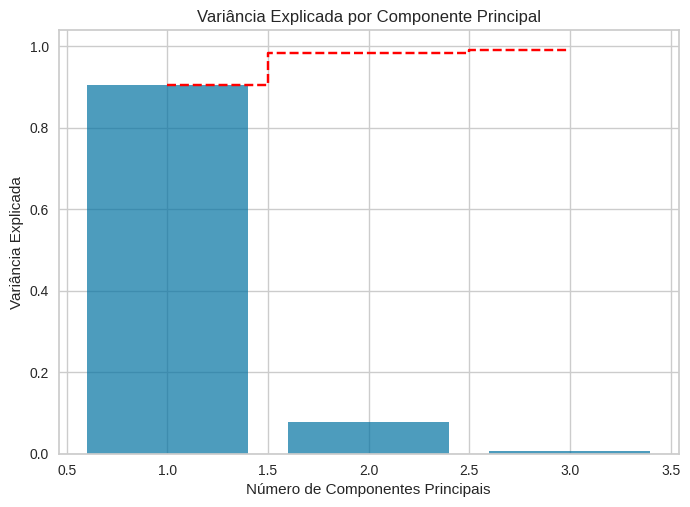

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

# Fazendo o escalonamento dos dados antes de aplicar o PCA.
clust_scaler = RobustScaler()
df_STD = pd.DataFrame(clust_scaler.fit_transform(clustering_data_final))

# Aplicando o PCA
n_components = 3  # Ajuste conforme necessário
pca = PCA(n_components=n_components)
df_PCA = pca.fit_transform(clustering_data_final)

# Obtendo a variância explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Imprimindo a variância explicada acumulada
print("Variância explicada acumulada:")
print(cumulative_explained_variance)

# Plotando um gráfico de barras para visualizar a variância explicada por cada componente
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.step(range(1, n_components + 1), cumulative_explained_variance, where='mid', linestyle='--', color='red')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada')
plt.title('Variância Explicada por Componente Principal')
plt.show()


In [ ]:
#clustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#Fazendo o escalonamento dos dados antes de aplicar o PCA.
clust_scaler = RobustScaler()
df_STD = pd.DataFrame(clust_scaler.fit_transform(clustering_data_final))

#aplicando o PCA
pca = PCA(n_components=10)
df_PCA = pca.fit_transform(clustering_data_final)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

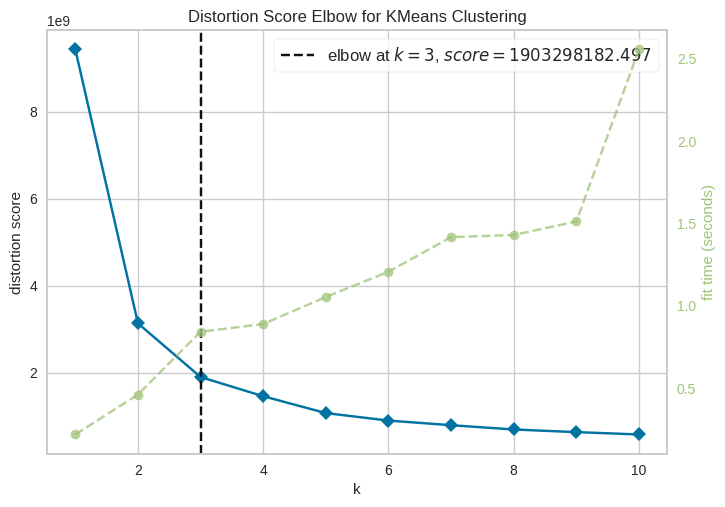

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inicializando o modelo KMeans
model = KMeans(random_state=1603)

# Inicializando o visualizador KelbowVisualizer
visualizer = KElbowVisualizer(model, k=(1, 11))

# Ajustando o visualizador aos dados
visualizer.fit(df_PCA)

# Plotando o gráfico do método Elbow
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


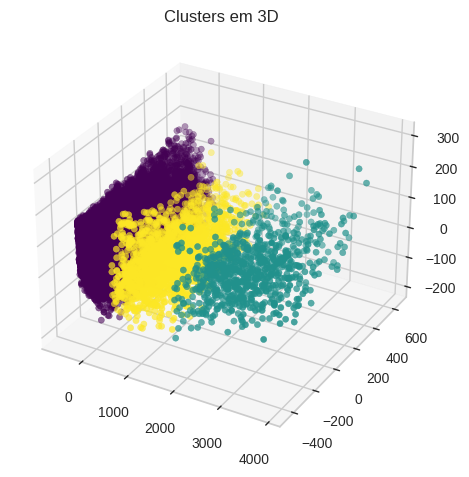

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Criar modelo KMeans com o número desejado de clusters
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_PCA)

# Obter os rótulos dos clusters
labels = kmeans.labels_

# Criar figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Plotar os pontos de dados coloridos pelos rótulos dos clusters
ax.scatter(df_PCA[:, 0], df_PCA[:, 1], df_PCA[:, 2], c=labels, cmap='viridis')

ax.set_title('Clusters em 3D')

# Mostrar gráfico
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


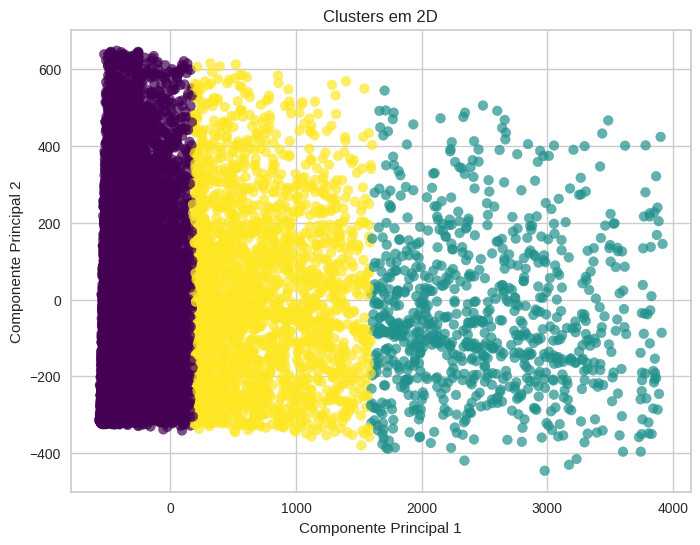

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Criar modelo KMeans com o número desejado de clusters
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_PCA)

# Obter os rótulos dos clusters
labels = kmeans.labels_

# Criar figura 2D
plt.figure(figsize=(8, 6))

# Plotar os pontos de dados coloridos pelos rótulos dos clusters
plt.scatter(df_PCA[:, 0], df_PCA[:, 1], c=labels, cmap='viridis', alpha=0.7)

plt.title('Clusters em 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Mostrar gráfico
plt.show()


In [ ]:
from collections import Counter

# Contar o número de amostras em cada cluster
cluster_counts = Counter(labels)

# Imprimir o número de amostras em cada cluster
for cluster, count in cluster_counts.items():
    print(f'Cluster {cluster}: {count} amostras')


Cluster 1: 10847 amostras
Cluster 0: 2192 amostras
Cluster 2: 838 amostras


In [ ]:
# K-means clustering para segmentação de clientes (k = 3)
km = KMeans(n_clusters=3, random_state=1603)
km.fit(df_PCA)
predict = km.predict(df_PCA)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#criando a feature cluster que contem o grupo que cada cliente pertence
clustering_data_final['Cluster'] = predict
#visualizando a mediana de algumas features por cada grupo
feature_columns = ['RFM_Score','Monetario_soma','Frequencia','Entrega_media','media_pontuacao_revisao','media_pontuacao_nps','total_pedidos_com_entrega_gratis','Recency','media_tempo_entre_pedidos',	'Monetario_media','Monetario_maximo','Subsidio_media','Subsidio_maximo','Subsidio_minimo']
clustering_data_final.groupby("Cluster")[feature_columns].agg("mean").round(2)

,RFM_Score,Monetario_soma,Frequencia,Entrega_media,media_pontuacao_revisao,media_pontuacao_nps,total_pedidos_com_entrega_gratis,Recency,media_tempo_entre_pedidos,Monetario_media,Monetario_maximo,Subsidio_media,Subsidio_maximo,Subsidio_minimo
Cluster,,,,,,,,,,,,,,
0,6.69,1245.61,388.02,5.02,4.54,9.00,8.74,41.16,2.88,71.91,139.95,2.83,11.23,0.02
1,3.84,222.86,329.45,4.38,4.28,8.91,2.46,79.31,3.87,62.86,92.16,2.63,6.83,0.77
2,7.34,3055.89,421.05,4.74,4.70,9.27,11.34,25.31,2.16,70.75,151.83,2.63,12.57,0.01
